# 1.Problem Statement

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

# 2.Objective 

Here objective would be to identify attrition of employee and also to highlight those factors which leads employee to attrition.Also help companies to improve human retention strategy.

# 3.Type of Problem

We want here to seperate the employee "Attrition" and "No Attrition" and have target label in our dataset. So it would be classification type of problem.

# 4.Import Library

In [3670]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 5.Getting Dataset

In [3671]:
data=pd.read_csv("hr_attrition.csv")

In [3672]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3673]:
data.shape

(1470, 35)

***1.The dataset contains 1470 observation and 35 columns.***

***2.The target variable would be "Attrition".***

In [3674]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

***1.There are 8 columns which are object type,26 columns are int type.***

In [3675]:
data.describe(include="all")

Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction  \
count          1470.0     1470.000000  ...               1470.000000   
unique            NaN             NaN  ...                       NaN   
top               NaN             NaN  ...                       NaN   
freq              NaN             NaN  ...                       NaN   
mean              1.0     1024.865306  ...                  2.712245   
std               0.0      602.024335  ...                  1.081209   
min               1.0        1.000000  ...                  1.000000   
25%               1.0      491.250000  ...                  2.000000   
50%               1.0     1020.500000  ...                  3.000000   
75%               1.0     1555.750000  ...                  4.000000   
max               1.0     2068.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
unique           NaN               NaN                NaN   
top              NaN               NaN                NaN   
freq             NaN               NaN                NaN   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

        TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
count             1470.000000     1470.000000     1470.000000   
unique                    NaN             NaN             NaN   
top                       NaN             NaN             NaN   
freq                      NaN             NaN             NaN   
mean                 2.799320        2.761224        7.008163   
std                  1.289271        0.706476        6.126525   
min                  0.000000        1.000000        0.000000   
25%                  2.000000        2.000000        3.000000   
50%                  3.000000        3.000000        5.000000   
75%                  3.000000        3.000000        9.000000   
max      

**Below are the observation:**

1. The min age of employee is 18 and maximum is 60 yrs old.The mean of Age is almost equal to medium.

2. There are 3 unique type of business Travel,which we will explore later.

3. Salary daily rate min is 102 and maximum is 1499,here also mean of daily rate is almost equal to medium.

4. There are 3 unique department.Maximum employee from R&D department.

5. There are 6 type of education field of employee.

6. We can't get more details of all 35 columns, so we will explore this later.

# 6.Checking the Null value

In [3676]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

***we can see there are no null value in dataset.**

# 7.Checking the duplicate data.

In [3677]:
data.duplicated().sum()

0

**There are no duplicate value in dataset.**

In [3678]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3679]:
data.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

# Seperating Numerical and categorical feature

In [3680]:
numeric_feat=[]
categorical_feat=[]
num=["int64","float64"]
cat=["O"]
for column in data.columns:
    if data[column].dtypes in num:
        numeric_feat.append(column)
    if data[column].dtypes in cat:
        categorical_feat.append(column)

**Dropping EmployeeCount,EmployeeNumber and StandardHours columns as these features would not require for our analysis.**

In [3681]:
numeric_feat

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [3682]:
categorical_feat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

# 8.Univariate Analysis

### Attrition-Target Variable

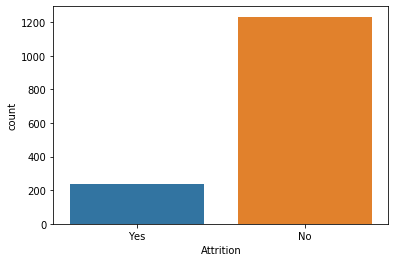

In [3683]:
sns.countplot(data["Attrition"])

In [3684]:
print("\nAttrition count in number")
print(data["Attrition"].value_counts())
print("\n***************************************")
print('\nAttrition count in percentage')
print(data["Attrition"].value_counts(normalize=True))


Attrition count in number
No     1233
Yes     237
Name: Attrition, dtype: int64

***************************************

Attrition count in percentage
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


**Below are the observation:**
1. As we can see there are 237( only 16% of our total observation) observation belong to Attrition target variable.
2. There are 1233 (83.8% of total observation) observation belong to "No Attrition" 
3. We can interpret easilty that our target class is "Inbalanced dataset".

### Age-Feature

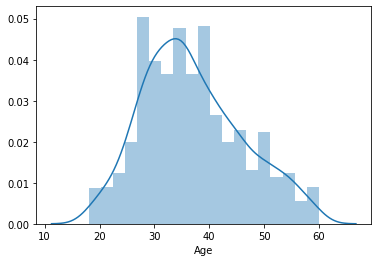

In [3685]:
sns.distplot(data["Age"])

**As we can see in above plot that Age data is normal distribution*

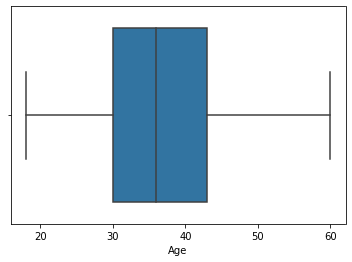

In [3686]:
sns.boxplot(data["Age"])

**There is no outlier in Age column.**

### BusinessTravel-Feature

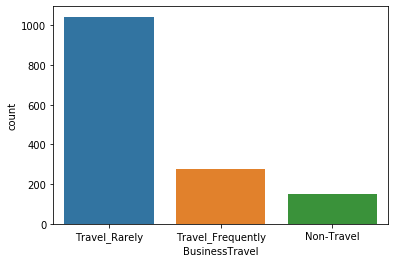

In [3687]:
sns.countplot(data["BusinessTravel"])

In [3688]:
print("\nBusinessTravel count in number")
print(data["BusinessTravel"].value_counts())
print("\n***************************************")
print('\nBusinessTravel count in percentage')
print(data["BusinessTravel"].value_counts(normalize=True))


BusinessTravel count in number
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

***************************************

BusinessTravel count in percentage
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64


**There are more employee in organization who travel very rarely.**

### DailyRate-Feature

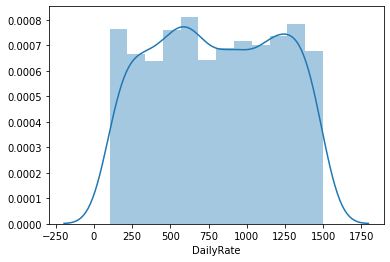

In [3689]:
sns.distplot(data["DailyRate"])

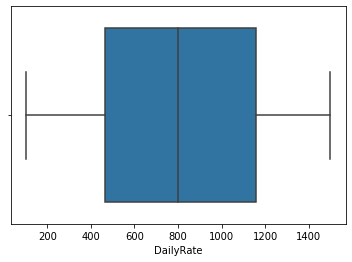

In [3690]:
sns.boxplot(data["DailyRate"])

**Daily Rate also have normal distribution and no outlier presence in Daily rate.**

### Department-Feature

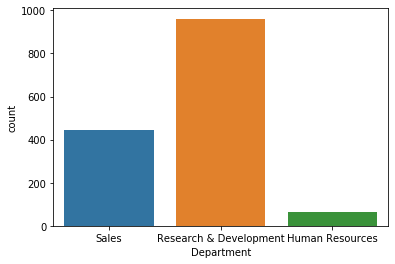

In [3691]:
sns.countplot(data["Department"])

In [3692]:
print("\nDepartment count in number")
print(data["Department"].value_counts())
print("\n***************************************")
print('\nDepartment count in percentage')
print(data["Department"].value_counts(normalize=True))


Department count in number
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

***************************************

Department count in percentage
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64


**from the above plot we observe that almost 65% of employee belong to R&D department.**

### DistanceFromHome -Feature

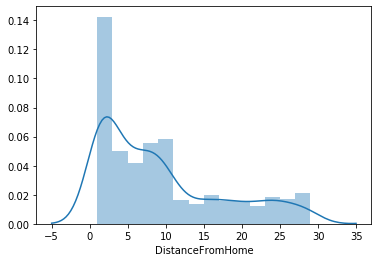

In [3693]:
sns.distplot(data["DistanceFromHome"])

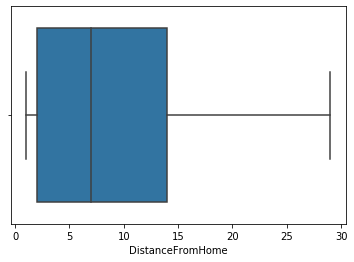

In [3694]:
sns.boxplot(data["DistanceFromHome"])

**We can observe that DistanceFromHome data is not distributed normally.**

### Education-Feature

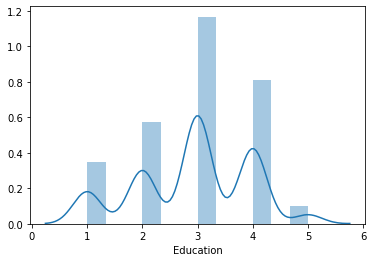

In [3695]:
sns.distplot(data["Education"])

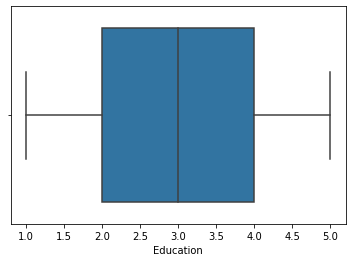

In [3696]:
sns.boxplot(data["Education"])

**We can observe that Education data is distributed almost normally.**

### EducationField-Feature

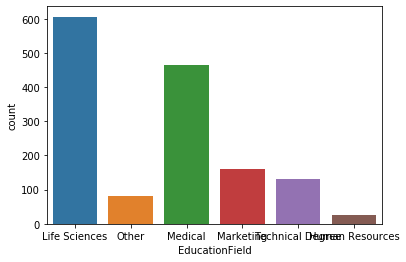

In [3697]:
sns.countplot(data["EducationField"])

In [3698]:
print("\nEducationField count in number")
print(data["EducationField"].value_counts())
print("\n***************************************")
print('\nEducationField count in percentage')
print(data["EducationField"].value_counts(normalize=True))


EducationField count in number
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

***************************************

EducationField count in percentage
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64


**We can interpret from above plot Life science and Medical educational background employee are more.**

### EmployeeCount-Feature

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


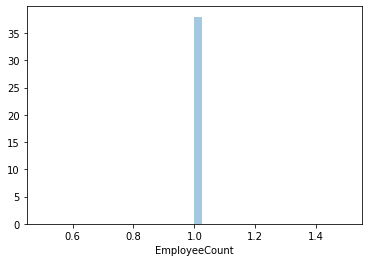

In [3699]:
sns.distplot(data["EmployeeCount"])

### EmployeeNumber-Feature

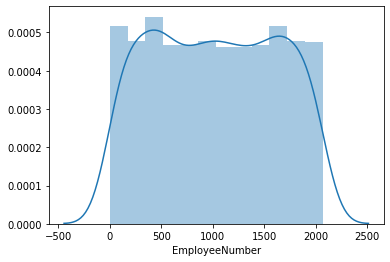

In [3700]:
sns.distplot(data["EmployeeNumber"])

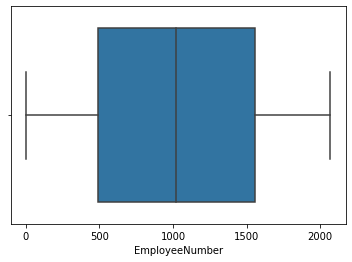

In [3701]:
sns.boxplot(data["EmployeeNumber"])

**EmployeeNumber also have normal distribution and no outlier presence in Daily rate.**

### EnvironmentSatisfaction-Feature

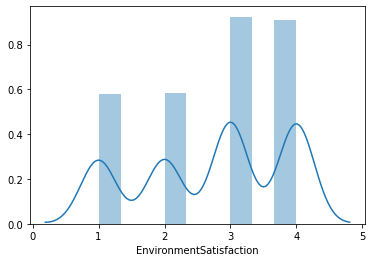

In [3702]:
sns.distplot(data["EnvironmentSatisfaction"])

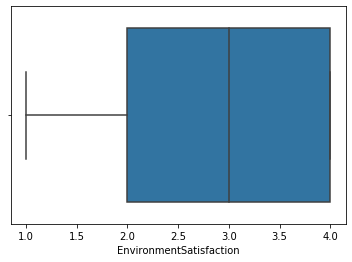

In [3703]:
sns.boxplot(data["EnvironmentSatisfaction"])

### Gender-Feature

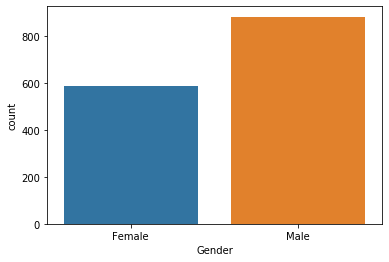

In [3704]:
sns.countplot(data["Gender"])

In [3705]:
print("\nGender count in number")
print(data["Gender"].value_counts())
print("\n***************************************")
print('\nGender count in percentage')
print(data["Gender"].value_counts(normalize=True))


Gender count in number
Male      882
Female    588
Name: Gender, dtype: int64

***************************************

Gender count in percentage
Male      0.6
Female    0.4
Name: Gender, dtype: float64


**There are 60% male employee in organization and 40% female.**

### HourlyRate-Feature

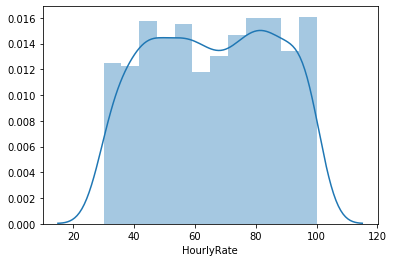

In [3706]:
sns.distplot(data["HourlyRate"])

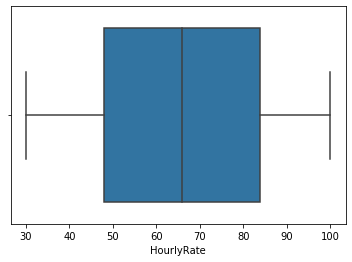

In [3707]:
sns.boxplot(data["HourlyRate"])

**We can observe that Hourly Rate is distributed almost normally.**

### JobInvolvement-Feature

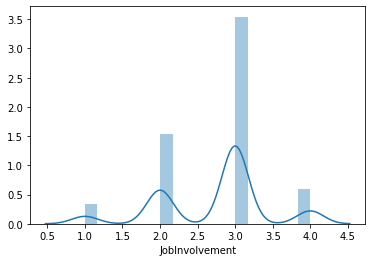

In [3708]:
sns.distplot(data["JobInvolvement"])

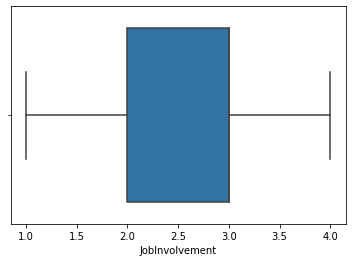

In [3709]:
sns.boxplot(data["JobInvolvement"])

**We can observe that Hourly Rate is distributed almost normally and no outliers.**

### JobLevel-Feature

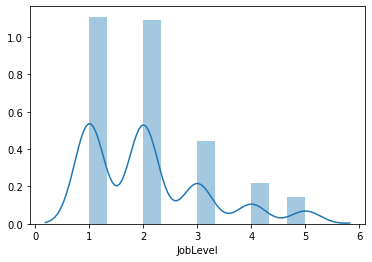

In [3710]:
sns.distplot(data["JobLevel"])

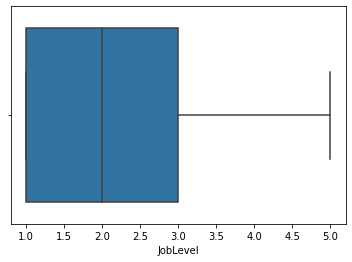

In [3711]:
sns.boxplot(data["JobLevel"])

**We can observe that JobLevel is not distributed normaly and having right skewed.**

### JobRole-Feature

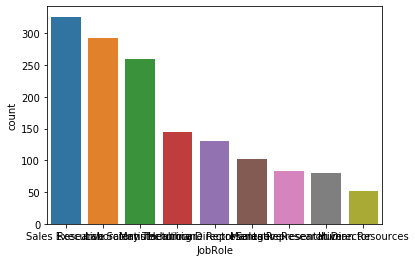

In [3712]:
sns.countplot(data["JobRole"])

In [3713]:
print("\nJobRole count in number")
print(data["JobRole"].value_counts())
print("\n***************************************")
print('\nJobRole count in percentage')
print(data["JobRole"].value_counts(normalize=True))


JobRole count in number
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

***************************************

JobRole count in percentage
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: JobRole, dtype: float64


**As we can see Sale executive job role employee are more and human resources job role is less in company.**

### JobSatisfaction Feature

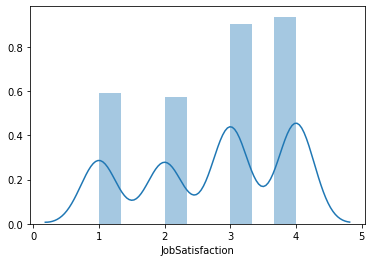

In [3714]:
sns.distplot(data["JobSatisfaction"])

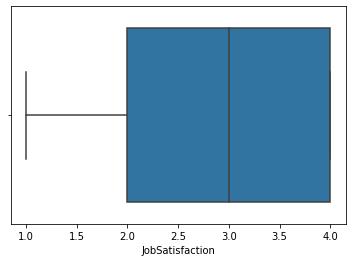

In [3715]:
sns.boxplot(data["JobSatisfaction"])

### MaritalStatus Feature

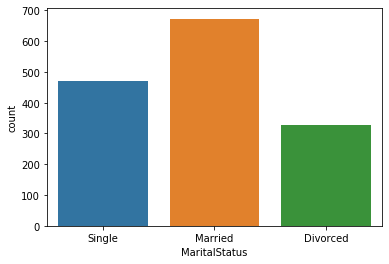

In [3716]:
sns.countplot(data["MaritalStatus"])

In [3717]:
print("\nMaritalStatus count in number")
print(data["MaritalStatus"].value_counts())
print("\n***************************************")
print('\nMaritalStatus count in percentage')
print(data["MaritalStatus"].value_counts(normalize=True))


MaritalStatus count in number
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

***************************************

MaritalStatus count in percentage
Married     0.457823
Single      0.319728
Divorced    0.222449
Name: MaritalStatus, dtype: float64


### MonthlyIncome Feature

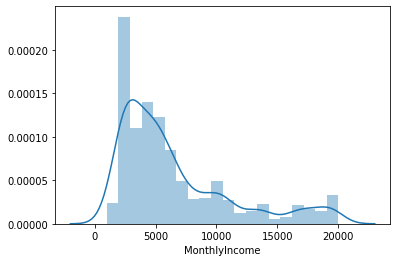

In [3718]:
sns.distplot(data["MonthlyIncome"])

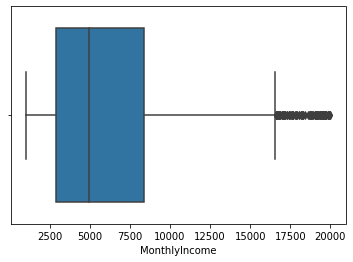

In [3719]:
sns.boxplot(data["MonthlyIncome"])

**We can interpret in above plot that Monthly income data is not normally distributed and having some outlier.**

### MonthlyRate Feature

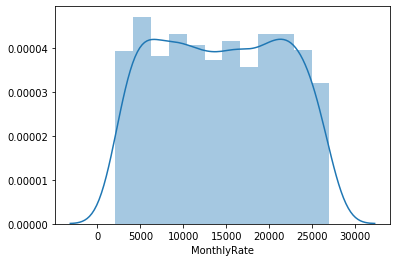

In [3720]:
sns.distplot(data["MonthlyRate"])

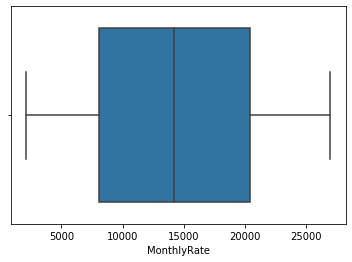

In [3721]:
sns.boxplot(data["MonthlyRate"])

**We can observe that Monthly Rate is distributed almost normally and no outliers.**

### NumCompaniesWorked Feature

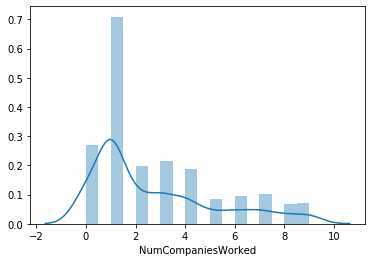

In [3722]:
sns.distplot(data["NumCompaniesWorked"])

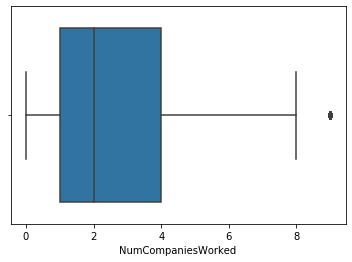

In [3723]:
sns.boxplot(data["NumCompaniesWorked"])

**We can observe that NumCompaniesWorked is not distributed normaly and having outlier.**

### Over18  Feature

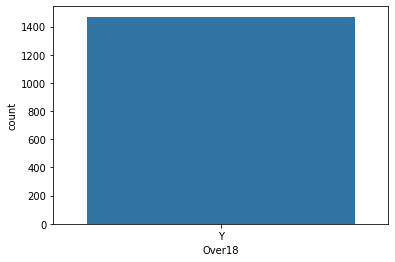

In [3724]:
sns.countplot(data["Over18"])

In [3725]:
data["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

**all employees are more than 18 yrs old.**

### OverTime  Feature

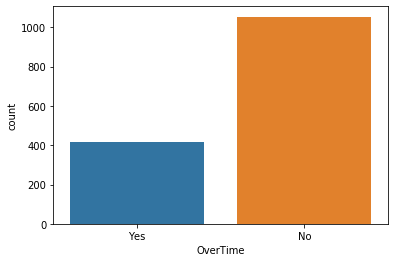

In [3726]:
sns.countplot(data["OverTime"])

In [3727]:
print("\nOverTime count in number")
print(data["OverTime"].value_counts())
print("\n***************************************")
print('\nOverTime count in percentage')
print(data["OverTime"].value_counts(normalize=True))


OverTime count in number
No     1054
Yes     416
Name: OverTime, dtype: int64

***************************************

OverTime count in percentage
No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64


**We can see 71.1% employees are not doing overtime.**

### PercentSalaryHike  Feature

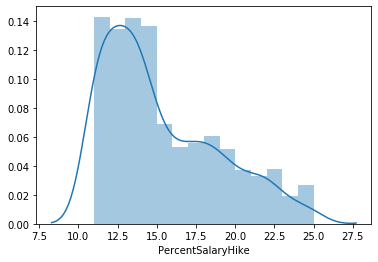

In [3728]:
sns.distplot(data["PercentSalaryHike"])

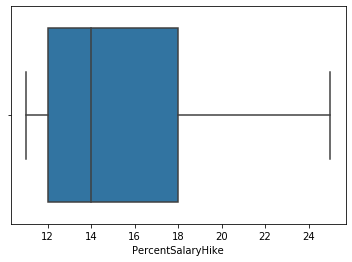

In [3729]:
sns.boxplot(data["PercentSalaryHike"])

**We can observe that PercentSalaryHike is not distributed normaly.**

### PerformanceRating Feature

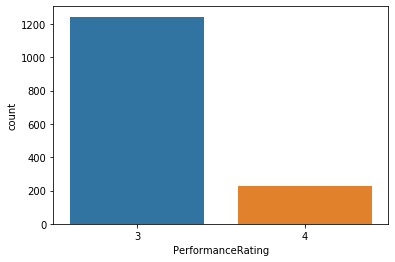

In [3730]:
sns.countplot(data["PerformanceRating"])

In [3731]:
data["PerformanceRating"].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

**we can see all people has got 3 and 4 rating, out of which 1244 employee has got 3 rating.**

### RelationshipSatisfaction Feature

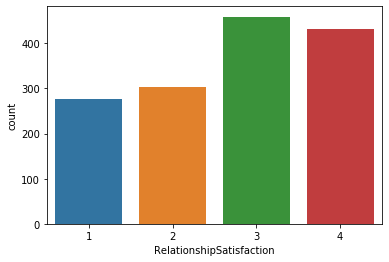

In [3732]:
sns.countplot(data["RelationshipSatisfaction"])

In [3733]:
print("\nRelationshipSatisfaction count in number")
print(data["RelationshipSatisfaction"].value_counts())
print("\n***************************************")
print('\nRelationshipSatisfaction count in percentage')
print(data["RelationshipSatisfaction"].value_counts(normalize=True))


RelationshipSatisfaction count in number
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

***************************************

RelationshipSatisfaction count in percentage
3    0.312245
4    0.293878
2    0.206122
1    0.187755
Name: RelationshipSatisfaction, dtype: float64


### StandardHours Feature

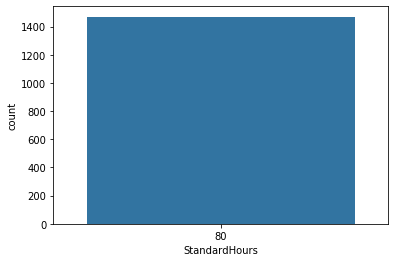

In [3734]:
sns.countplot(data["StandardHours"])

In [3735]:
data["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

**All employee working standardhours is 80.**

### StockOptionLevel Feature

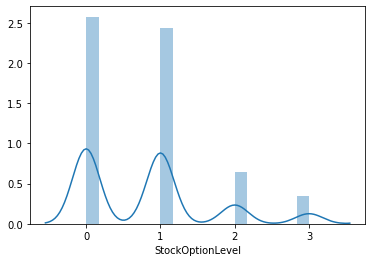

In [3736]:
sns.distplot(data["StockOptionLevel"])

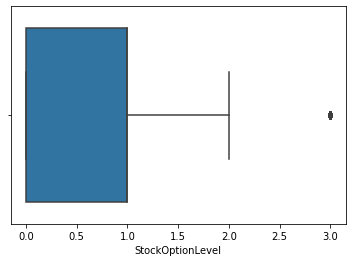

In [3737]:
sns.boxplot(data["StockOptionLevel"])

**We can interpret that stockoptionlevel data is not uniform distributed and having some outlier also.**

### TotalWorkingYears Feature

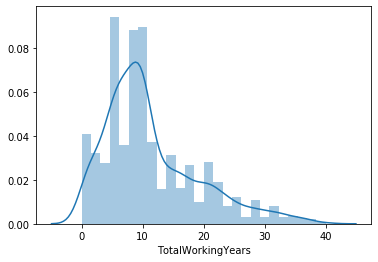

In [3738]:
sns.distplot(data["TotalWorkingYears"])

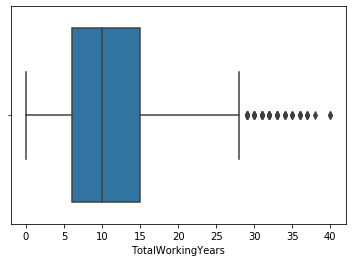

In [3739]:
sns.boxplot(data["TotalWorkingYears"])

**As we can see ther are lot of outliers and data is skeewed right side.**

### TrainingTimesLastYear Feature

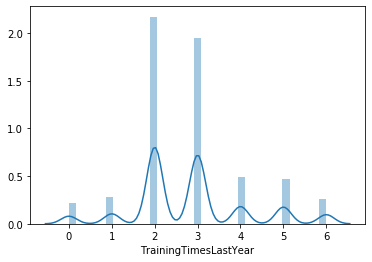

In [3740]:
sns.distplot(data["TrainingTimesLastYear"])

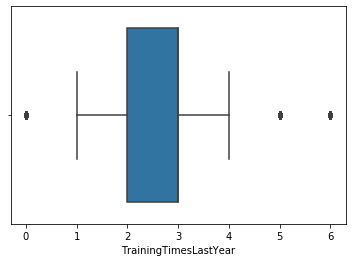

In [3741]:
sns.boxplot(data["TrainingTimesLastYear"])

**As we can see ther are some outliers.**

### WorkLifeBalance Feature

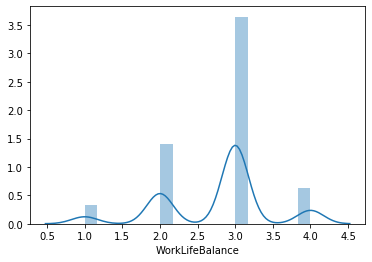

In [3742]:
sns.distplot(data["WorkLifeBalance"])

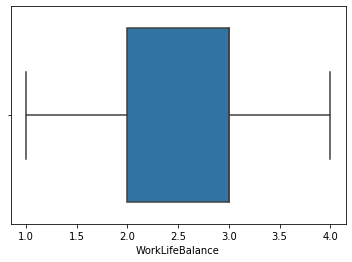

In [3743]:
sns.boxplot(data["WorkLifeBalance"])

### YearsAtCompany Feature

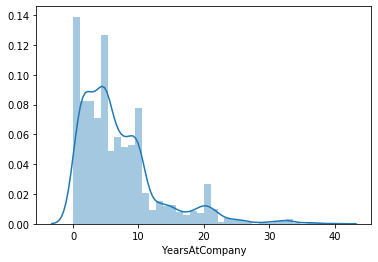

In [3744]:
sns.distplot(data["YearsAtCompany"])

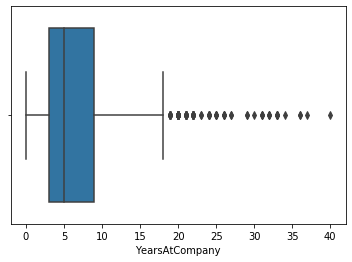

In [3745]:
sns.boxplot(data["YearsAtCompany"])

**As we can see Yearsatcompany featues having many upper outliers and data is skeewed right.**

### YearsInCurrentRole Feature

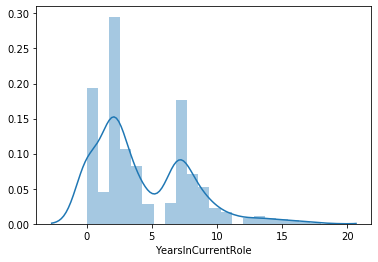

In [3746]:
sns.distplot(data["YearsInCurrentRole"])

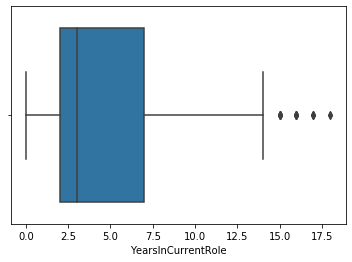

In [3747]:
sns.boxplot(data["YearsInCurrentRole"])

**Yearsincurrentrole features having some outliers.**

### YearsSinceLastPromotion Feature

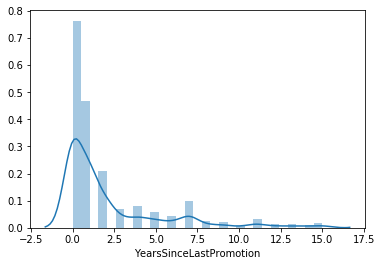

In [3748]:
sns.distplot(data["YearsSinceLastPromotion"])

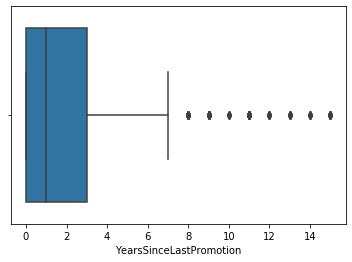

In [3749]:
sns.boxplot(data["YearsSinceLastPromotion"])

**yearssincelastpromotion features having lot of outliers and data is skeewed right.**

### YearsWithCurrManager Feature

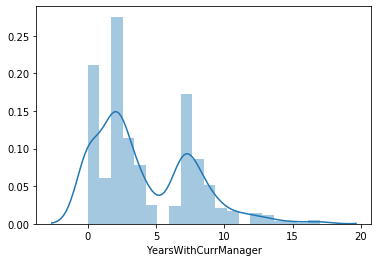

In [3750]:
sns.distplot(data["YearsWithCurrManager"])

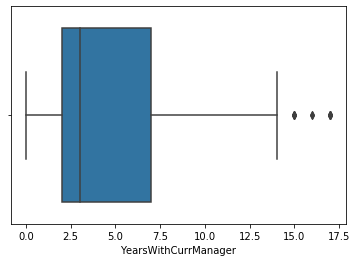

In [3751]:
sns.boxplot(data["YearsWithCurrManager"])

**YearsWithCurrManager features having some of outliers and data is skeewed right.**

# 9.Bivariate Analysis

### Age Vs BusinessTravel

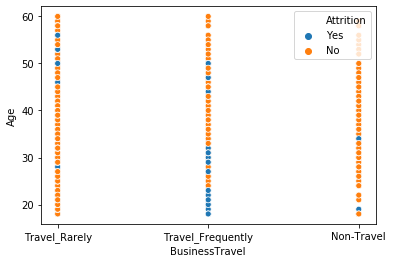

In [3752]:
sns.scatterplot(x="BusinessTravel",y="Age",data=data,hue="Attrition")

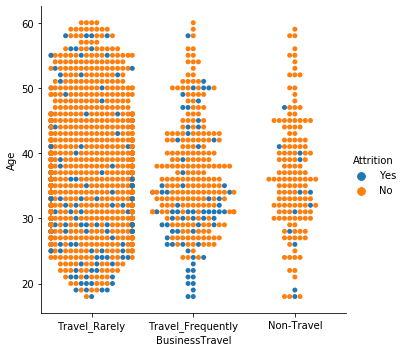

In [3753]:
sns.catplot(x="BusinessTravel", y="Age", data=data,hue="Attrition", kind="swarm")

**We can interpret from the above plot that Age between 18 to 33 who travel frequently attrition is more in that segment.**

### BusinessTravel Vs Age Vs Gender

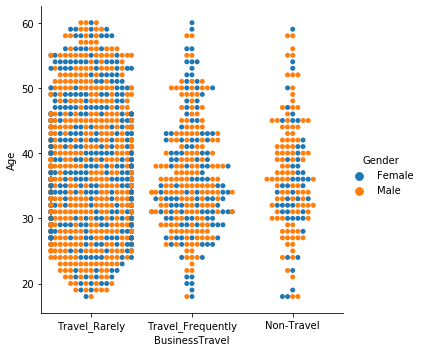

In [3754]:
sns.catplot(x="BusinessTravel", y="Age", data=data,hue="Gender", kind="swarm")

**We can see from the above plot that age between 25 yrs to 38 yrs are travel frequently.**

### BusinessTravel Vs Age Vs JobSatisfaction

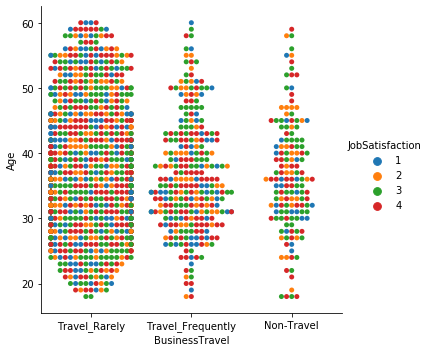

In [3755]:
sns.catplot(x="BusinessTravel", y="Age", data=data,hue="JobSatisfaction", kind="swarm")

**We can see that those employees are travel frequently most of employees satisfied with job.**

### BusinessTravel vs JobSatisfaction vs Attrition

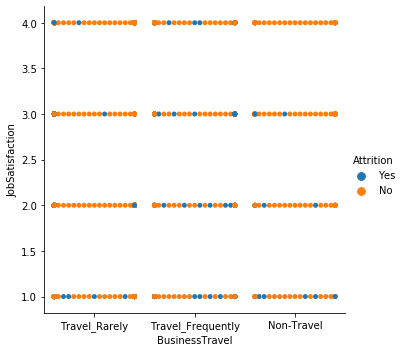

In [3756]:
sns.catplot(x="BusinessTravel", y="JobSatisfaction", data=data,hue="Attrition", kind="swarm")

**We can see that those employees who are travelling frequently compare to other travel type attrition is more.**

###  Age Vs DailyRate

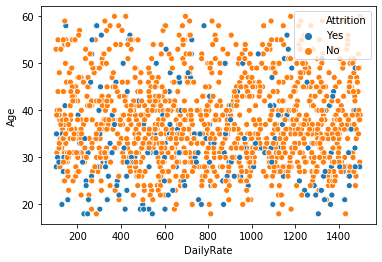

In [3757]:
sns.scatterplot(x="DailyRate",y="Age",data=data,hue="Attrition")

**We can analyse that age between 18 to 35 yrs with daily wages 200 to 800 ranges Attrition is more.**

### DailyRate Vs BusinessTravel

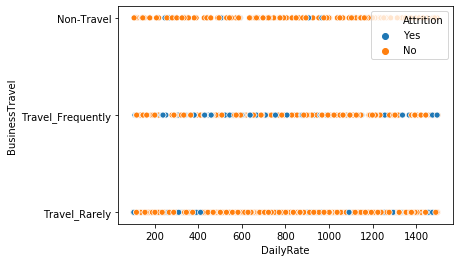

In [3758]:
sns.scatterplot(x="DailyRate",y="BusinessTravel",data=data,hue="Attrition")

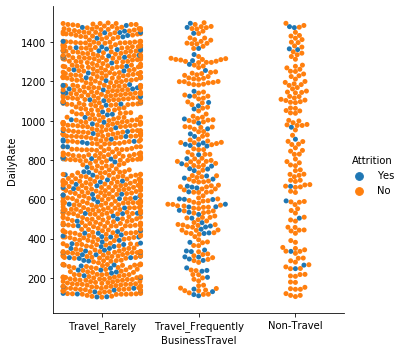

In [3759]:
sns.catplot(x="BusinessTravel", y="DailyRate", data=data,hue="Attrition", kind="swarm")

**We can interpret that employee attrition is more in all daily rate and those employee who traverl rarely and frequently.**

### DailyRate Vs department 

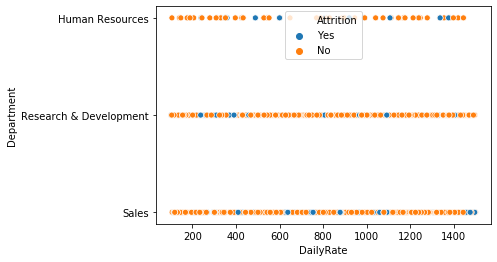

In [3760]:
sns.scatterplot(x="DailyRate",y="Department",data=data,hue="Attrition")

**We can see attrition is more from sales department and dailyrate is not impacting on attrition.**

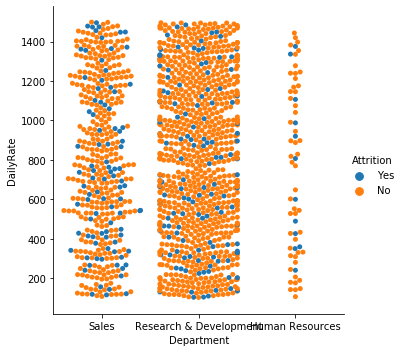

In [3761]:
sns.catplot(x="Department", y="DailyRate", data=data,hue="Attrition", kind="swarm")

### DistanceFromHome Vs dailyRate 

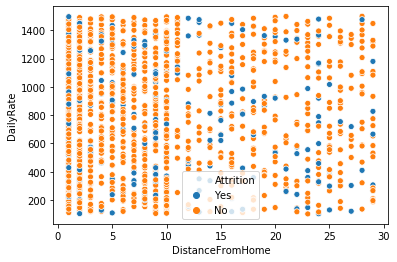

In [3762]:
sns.scatterplot(x="DistanceFromHome",y="DailyRate",data=data,hue="Attrition")

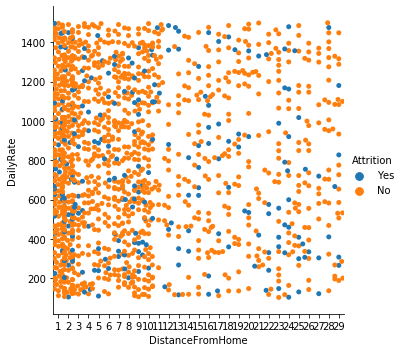

In [3763]:
sns.catplot(x="DistanceFromHome", y="DailyRate", data=data,hue="Attrition", kind="swarm")

**We can interpret that employee who travel more than 15 km attrition is more and most of employee are travelling maximum 10 km.**

### EnvironmentSatisfaction Vs HourlyRate

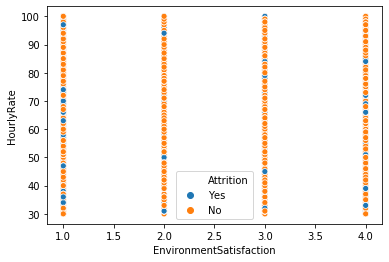

In [3764]:
sns.scatterplot(x="EnvironmentSatisfaction",y="HourlyRate",data=data,hue="Attrition")

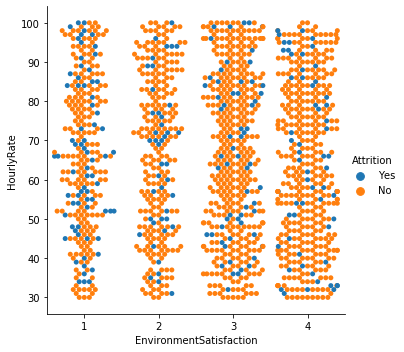

In [3765]:
sns.catplot(x="EnvironmentSatisfaction", y="HourlyRate", data=data,hue="Attrition", kind="swarm")

**We can interpret that employee who are satisfied with enviornment attrition is less.**

### JobSatisfaction Vs HourlyRate

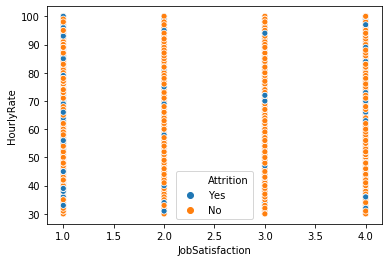

In [3766]:
sns.scatterplot(x="JobSatisfaction",y="HourlyRate",data=data,hue="Attrition")

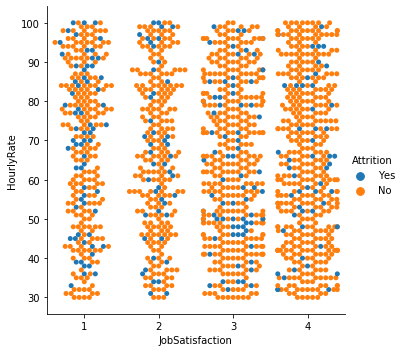

In [3767]:
sns.catplot(x="JobSatisfaction", y="HourlyRate", data=data,hue="Attrition", kind="swarm")

**here also we can see same pattern like environmentsatisfaction where employee who have jobsatisfaction attrition is less.**

### MartialStatus Vs dailyRate

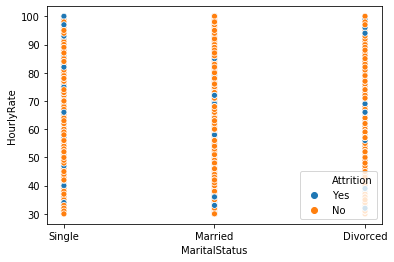

In [3768]:
sns.scatterplot(x="MaritalStatus",y="HourlyRate",data=data,hue="Attrition")

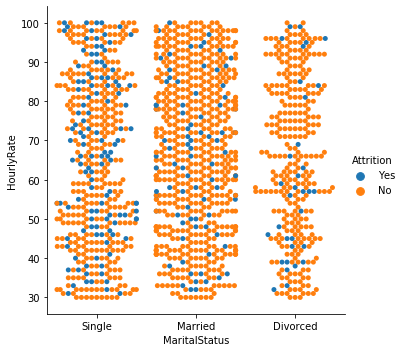

In [3769]:
sns.catplot(x="MaritalStatus", y="HourlyRate", data=data,hue="Attrition", kind="swarm")

We can interpret that Divorced employee attrition is less and single employee attrition is more compare to others.Also single employee whose hourly rate is more attrition also is more.**

### MartialStatus Vs MonthlyIncome

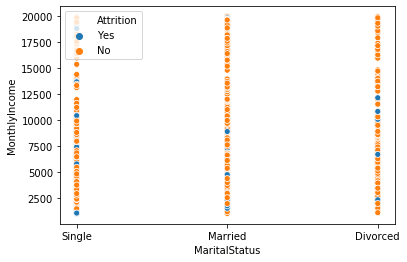

In [3770]:
sns.scatterplot(x="MaritalStatus",y="MonthlyIncome",data=data,hue="Attrition")

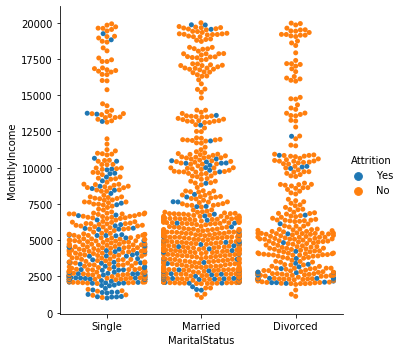

In [3771]:
sns.catplot(x="MaritalStatus", y="MonthlyIncome", data=data,hue="Attrition", kind="swarm")

We can interpret easily that monthly income with range between 2500 to 7500 employees are more and single employee in 2500 to 7500 monthly income ranges attrition is more.**

### MonthlyIncome Vs Overtime

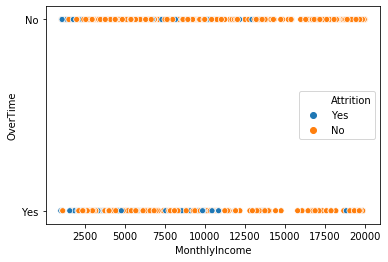

In [3772]:
sns.scatterplot(x="MonthlyIncome",y="OverTime",data=data,hue="Attrition")

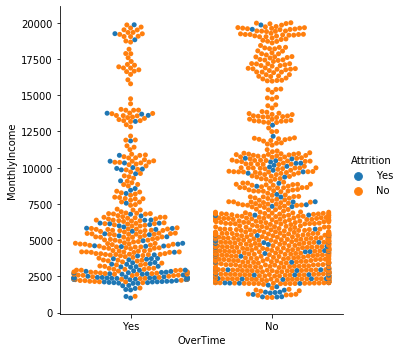

In [3773]:
sns.catplot(x="OverTime", y="MonthlyIncome", data=data,hue="Attrition", kind="swarm")

**We can interpret easily that low monthly income ranges from 2500 to 7500 who are doing overtime attrition is more.**

### MonthlyIncome Vs PercentSalaryHike

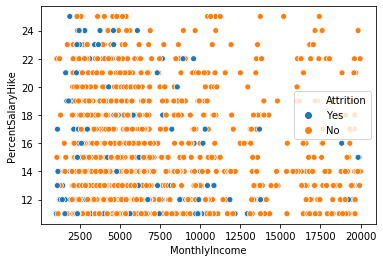

In [3774]:
sns.scatterplot(x="MonthlyIncome",y="PercentSalaryHike",data=data,hue="Attrition")

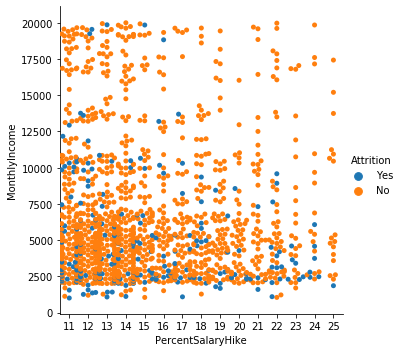

In [3775]:
sns.catplot(x="PercentSalaryHike", y="MonthlyIncome", data=data,hue="Attrition", kind="swarm")

**As we can see less monthly income employee whose percentsalaryhike more or less attrition is more and also percentsalaryhike more than 18% and whose monthly income is more than 10000 attrition is almost nil.**

### PerformanceRating Vs PercentSalaryHike

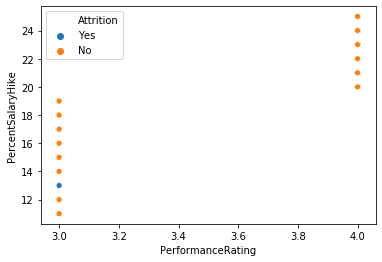

In [3776]:
sns.scatterplot(x="PerformanceRating",y="PercentSalaryHike",data=data,hue="Attrition")

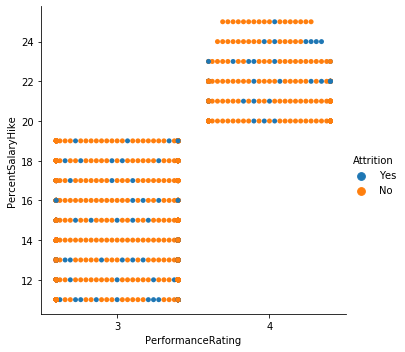

In [3777]:
sns.catplot(x="PerformanceRating", y="PercentSalaryHike", data=data,hue="Attrition", kind="swarm")

**As we can see employee with less performance rating and whose salary is range between 12 to 19% attrition is high.**

### TotalWorkingYears Vs MonthlyIncome

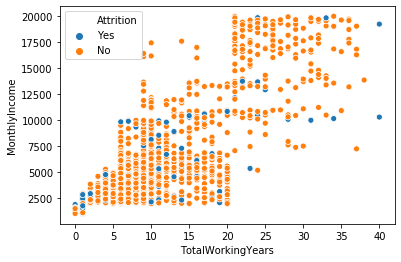

In [3778]:
sns.scatterplot(x="TotalWorkingYears",y="MonthlyIncome",data=data,hue="Attrition")

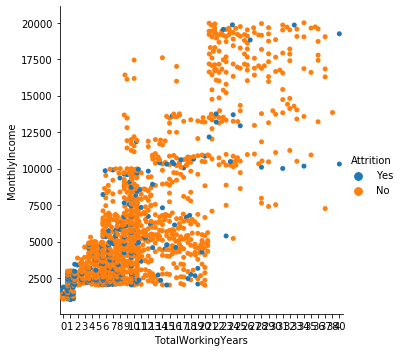

In [3779]:
sns.catplot(x="TotalWorkingYears", y="MonthlyIncome", data=data,hue="Attrition", kind="swarm")

**We can see total working years from 6-20 with less monthly income from 2500 to 10000 attrition is more.**

### WorkLifeBalance Vs MonthlyIncome

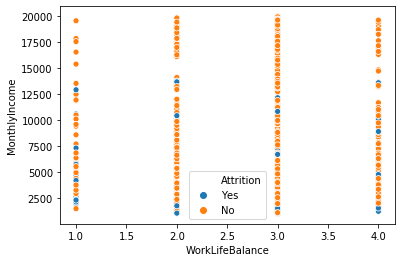

In [3780]:
sns.scatterplot(x="WorkLifeBalance",y="MonthlyIncome",data=data,hue="Attrition")

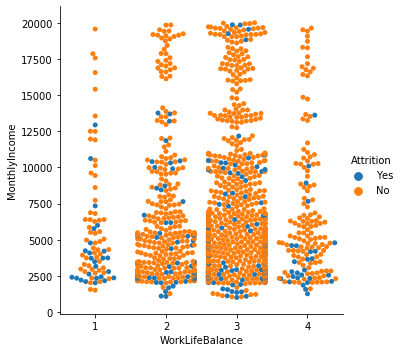

In [3781]:
sns.catplot(x="WorkLifeBalance", y="MonthlyIncome", data=data,hue="Attrition", kind="swarm")

**Monthly income from 2500 to 10000 attrition is more . Also monthly salary more than 18000 and moderate work life balance category employee some attrition is there.**

### YearsSinceLastPromotion Vs MonthlyIncome

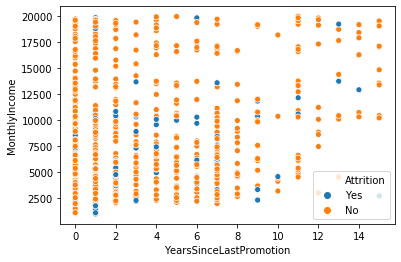

In [3782]:
sns.scatterplot(x="YearsSinceLastPromotion",y="MonthlyIncome",data=data,hue="Attrition")

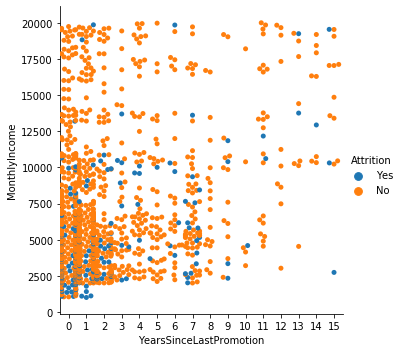

In [3783]:
sns.catplot(x="YearsSinceLastPromotion", y="MonthlyIncome", data=data,hue="Attrition", kind="swarm")

**We can see from 2-7 years who has got promotion with salary ranges from 2500 to 10000 attrition is more.**

### YearsWithCurrManager Vs MonthlyIncome

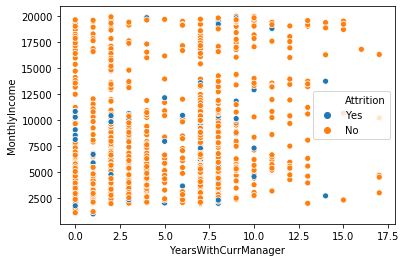

In [3784]:
sns.scatterplot(x="YearsWithCurrManager",y="MonthlyIncome",data=data,hue="Attrition")

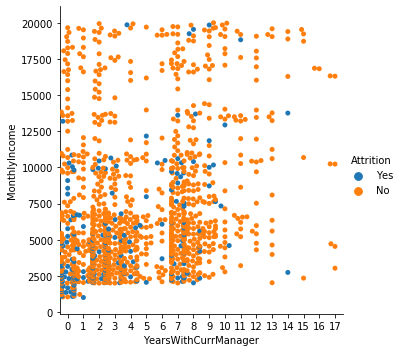

In [3785]:
sns.catplot(x="YearsWithCurrManager", y="MonthlyIncome", data=data,hue="Attrition", kind="swarm")

**We can interpret that employee who spent more years with current manager attrition is less.**

# 10. Feature Engineering

**We will convert our categorical columns into numerical for our analysis and also for model.**

In [3786]:
categorical_feat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

**As we can see mentioned abovoe features are categorical type column.**

### 10.1 Applying label Encoder technique for Attrition Target label

In [3787]:
from sklearn.preprocessing import LabelEncoder

In [3788]:
lab_enc=LabelEncoder()

In [3789]:
data1=lab_enc.fit_transform(data["Attrition"])
pd.Series(data1)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Length: 1470, dtype: int32

In [3791]:
data["Attrition"]=data1

In [3792]:
data

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2        

### 10.2 Applying OneHot Encoder technique by get dummies for BusinessTravel feature.

In [3793]:
businesstraver_dummies=pd.get_dummies(data.BusinessTravel)

In [3794]:
data=pd.concat([data,businesstraver_dummies],axis=1)

In [3795]:
data=data.drop("BusinessTravel",axis=1)

In [3797]:
data

Age  Attrition  DailyRate              Department  DistanceFromHome  \
0      41          1       1102                   Sales                 1   
1      49          0        279  Research & Development                 8   
2      37          1       1373  Research & Development                 2   
3      33          0       1392  Research & Development                 3   
4      27          0        591  Research & Development                 2   
...   ...        ...        ...                     ...               ...   
1465   36          0        884  Research & Development                23   
1466   39          0        613  Research & Development                 6   
1467   27          0        155  Research & Development                 4   
1468   49          0       1023                   Sales                 2   
1469   34          0        628  Research & Development                 8   

      Education EducationField  EmployeeCount  EmployeeNumber  \
0             2  Life Sciences              1               1   
1             1  Life Sciences              1               2   
2             2          Other              1               4   
3             4  Life Sciences              1               5   
4             1        Medical              1               7   
...         ...            ...            ...             ...   
1465          2        Medical              1            2061   
1466          1        Medical              1            2062   
1467          3  Life Sciences              1            2064   
1468          3        Medical              1            2065   
1469          3        Medical              1            2068   

      EnvironmentSatisfaction  ... TotalWorkingYears  TrainingTimesLastYear  \
0                           2  ...                 8                      0   
1                           3  ...                10                      3   
2                           4  ...                 7                      3   
3                           4  ...                 8                      3   
4                           1  ...                 6                      3   
...                       ...  ...               ...                    ...   
1465                        3  ...                17                      3   
1466                        4  ...                 9                      5   
1467                        2  ...                 6                      0   
1468                        4  ...                17                      3   
1469                        2  ...                 6                      3   

      WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                   1               6                  4   
1                   3              10                  7   
2                   3               0                  0   
3                   3               8                  7   
4                   3               2                  2   
...               ...             ...                ...   
1465                3               5                  2   
1466                3               7                  7   
1467                3               6                  2   
1468                2               9                  6   
1469                4               4                  3   

      YearsSinceLastPromotion YearsWithCurrManager  Non-Travel  \
0                           0                    5           0   
1                           1                    7           0   
2                           0                    0           0   
3                           3                    0           0   
4                           2                    2           0   
...                       ...                  ...         ...   
1465                        0                    3           0   
1466                        1                    7           0   
1467                        0       

### 10.3 Applying OneHot Encoder technique by get dummies for Department feature.

In [3354]:
department_dummies=pd.get_dummies(data.Department)

In [3355]:
data=pd.concat([data,department_dummies],axis=1)

In [3356]:
data=data.drop("Department",axis=1)

In [3357]:
data

Age  Attrition  DailyRate  DistanceFromHome  Education EducationField  \
0      41          1       1102                 1          2  Life Sciences   
1      49          0        279                 8          1  Life Sciences   
2      37          1       1373                 2          2          Other   
3      33          0       1392                 3          4  Life Sciences   
4      27          0        591                 2          1        Medical   
...   ...        ...        ...               ...        ...            ...   
1465   36          0        884                23          2        Medical   
1466   39          0        613                 6          1        Medical   
1467   27          0        155                 4          3  Life Sciences   
1468   49          0       1023                 2          3        Medical   
1469   34          0        628                 8          3        Medical   

      EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  ...  \
0                 1               1                        2  Female  ...   
1                 1               2                        3    Male  ...   
2                 1               4                        4    Male  ...   
3                 1               5                        4  Female  ...   
4                 1               7                        1    Male  ...   
...             ...             ...                      ...     ...  ...   
1465              1            2061                        3    Male  ...   
1466              1            2062                        4    Male  ...   
1467              1            2064                        2    Male  ...   
1468              1            2065                        4    Male  ...   
1469              1            2068                        2    Male  ...   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466               7                   7                        1   
1467               6                   2                        0   
1468               9                   6                        0   
1469               4                   3                        1   

     YearsWithCurrManager  Non-Travel Travel_Frequently  Travel_Rarely  \
0                       5           0                 0              1   
1                       7           0                 1              0   
2                       0           0                 0              1   
3                       0           0                 1              0   
4                       2           0                 0              1   
...                   ...         ...               ...            ...   
1465                    3           0                 1              0   
1466                    7           0                 0              1   
1467                    3           0                 0              1   
1468                    8           0                 1              0   
1469                    2           0                 0              1   

      Human Resources  Research & Development Sales  
0                   0                       0     1  
1                   0                       1     0  
2                   0                       1     0  
3                   0                       1     0  
4                   0                       1     0  
...               ...                     ...   ...  
1465                0               

### 10.3 Applying OneHot Encoder technique by get dummies for EducationField feature.

In [3358]:
EducationField_dummies=pd.get_dummies(data.EducationField)

In [3359]:
data=pd.concat([data,EducationField_dummies],axis=1)

In [3360]:
data=data.drop("EducationField",axis=1)

In [3361]:
data

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41          1       1102                 1          2              1   
1      49          0        279                 8          1              1   
2      37          1       1373                 2          2              1   
3      33          0       1392                 3          4              1   
4      27          0        591                 2          1              1   
...   ...        ...        ...               ...        ...            ...   
1465   36          0        884                23          2              1   
1466   39          0        613                 6          1              1   
1467   27          0        155                 4          3              1   
1468   49          0       1023                 2          3              1   
1469   34          0        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0                  1                        2  Female          94  ...   
1                  2                        3    Male          61  ...   
2                  4                        4    Male          92  ...   
3                  5                        4  Female          56  ...   
4                  7                        1    Male          40  ...   
...              ...                      ...     ...         ...  ...   
1465            2061                        3    Male          41  ...   
1466            2062                        4    Male          42  ...   
1467            2064                        2    Male          87  ...   
1468            2065                        4    Male          63  ...   
1469            2068                        2    Male          82  ...   

      Travel_Rarely Human Resources Research & Development  Sales  \
0                 1               0                      0      1   
1                 0               0                      1      0   
2                 1               0                      1      0   
3                 0               0                      1      0   
4                 1               0                      1      0   
...             ...             ...                    ...    ...   
1465              0               0                      1      0   
1466              1               0                      1      0   
1467              1               0                      1      0   
1468              0               0                      0      1   
1469              1               0                      1      0   

     Human Resources  Life Sciences  Marketing  Medical Other Technical Degree  
0                  0              1          0        0     0                0  
1                  0              1          0        0     0                0  
2                  0              0          0        0     1                0  
3                  0              1          0        0     0                0  
4                  0              0          0        1     0                0  
...              ...            ...        ...      ...   ...              ...  
1465               0              0          0        1     0                0  
1466               0              0          0        1     0                0  
1467               0              1          0        0     0                0  
1468               0              0          0        1     0                0  
1469               0              0          0        1     0                0  

[1470 rows x 44 columns]

### 10.4 Applying OneHot Encoder technique by get dummies for Gender feature.

In [3362]:
gender_dummies=pd.get_dummies(data.Gender)

In [3363]:
data=pd.concat([data,gender_dummies],axis=1)

In [3364]:
data=data.drop("Gender",axis=1)

In [3365]:
data

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41          1       1102                 1          2              1   
1      49          0        279                 8          1              1   
2      37          1       1373                 2          2              1   
3      33          0       1392                 3          4              1   
4      27          0        591                 2          1              1   
...   ...        ...        ...               ...        ...            ...   
1465   36          0        884                23          2              1   
1466   39          0        613                 6          1              1   
1467   27          0        155                 4          3              1   
1468   49          0       1023                 2          3              1   
1469   34          0        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      ...  Research & Development Sales  Human Resources Life Sciences  \
0     ...                       0     1                0             1   
1     ...                       1     0                0             1   
2     ...                       1     0                0             0   
3     ...                       1     0                0             1   
4     ...                       1     0                0             0   
...   ...                     ...   ...              ...           ...   
1465  ...                       1     0                0             0   
1466  ...                       1     0                0             0   
1467  ...                       1     0                0             1   
1468  ...                       0     1                0             0   
1469  ...                       1     0                0             0   

      Marketing  Medical  Other Technical Degree Female  Male  
0             0        0      0                0      1     0  
1             0        0      0                0      0     1  
2             0        0      1                0      0     1  
3             0        0      0                0      1     0  
4             0        1      0                0      0     1  
...         ...      ...    ...              ...    ...   ...  
1465          0        1      0                0      0     1  
1466          0        1      0                0      0     1  
1467          0        0      0                0      0     1  
1468          0        1      0                0      0     1  
1469          0        1      0                0      0     1  

[1470 rows x 45 columns]

### 10.5 Applying OneHot Encoder technique by get dummies for Job Role feature.

In [3366]:
Jobrole_dummies=pd.get_dummies(data.JobRole)

In [3367]:
data=pd.concat([data,Jobrole_dummies],axis=1)

In [3368]:
data=data.drop("JobRole",axis=1)

In [3369]:
data

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41          1       1102                 1          2              1   
1      49          0        279                 8          1              1   
2      37          1       1373                 2          2              1   
3      33          0       1392                 3          4              1   
4      27          0        591                 2          1              1   
...   ...        ...        ...               ...        ...            ...   
1465   36          0        884                23          2              1   
1466   39          0        613                 6          1              1   
1467   27          0        155                 4          3              1   
1468   49          0       1023                 2          3              1   
1469   34          0        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      ...  Male  Healthcare Representative Human Resources  \
0     ...     0                          0               0   
1     ...     1                          0               0   
2     ...     1                          0               0   
3     ...     0                          0               0   
4     ...     1                          0               0   
...   ...   ...                        ...             ...   
1465  ...     1                          0               0   
1466  ...     1                          1               0   
1467  ...     1                          0               0   
1468  ...     1                          0               0   
1469  ...     1                          0               0   

      Laboratory Technician  Manager  Manufacturing Director  \
0                         0        0                       0   
1                         0        0                       0   
2                         1        0                       0   
3                         0        0                       0   
4                         1        0                       0   
...                     ...      ...                     ...   
1465                      1        0                       0   
1466                      0        0                       0   
1467                      0        0                       1   
1468                      0        0                       0   
1469                      1        0                       0   

     Research Director Research Scientist  Sales Executive  \
0                    0                  0                1   
1                    0                  1                0   
2                    0                  0                0   
3                    0                  1                0   
4                    0                  0                0   
...                ...                ...              ...   
1465                 0                  0                0   
1466                 0                  0                0   
1467                 0                  0                0  

### 10.6 Applying OneHot Encoder technique by get dummies for MaritalStatus feature.

In [3370]:
Marital_dummies=pd.get_dummies(data.MaritalStatus)

In [3371]:
data=pd.concat([data,Marital_dummies],axis=1)

In [3372]:
data=data.drop("MaritalStatus",axis=1)

In [3373]:
data

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41          1       1102                 1          2              1   
1      49          0        279                 8          1              1   
2      37          1       1373                 2          2              1   
3      33          0       1392                 3          4              1   
4      27          0        591                 2          1              1   
...   ...        ...        ...               ...        ...            ...   
1465   36          0        884                23          2              1   
1466   39          0        613                 6          1              1   
1467   27          0        155                 4          3              1   
1468   49          0       1023                 2          3              1   
1469   34          0        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      ...  Laboratory Technician  Manager  Manufacturing Director  \
0     ...                      0        0                       0   
1     ...                      0        0                       0   
2     ...                      1        0                       0   
3     ...                      0        0                       0   
4     ...                      1        0                       0   
...   ...                    ...      ...                     ...   
1465  ...                      1        0                       0   
1466  ...                      0        0                       0   
1467  ...                      0        0                       1   
1468  ...                      0        0                       0   
1469  ...                      1        0                       0   

      Research Director  Research Scientist Sales Executive  \
0                     0                   0               1   
1                     0                   1               0   
2                     0                   0               0   
3                     0                   1               0   
4                     0                   0               0   
...                 ...                 ...             ...   
1465                  0                   0               0   
1466                  0                   0               0   
1467                  0                   0               0   
1468                  0                   0               1   
1469                  0                   0               0   

     Sales Representative  Divorced  Married  Single  
0                       0         0        0       1  
1                       0         0        1       0  
2                       0         0        0       1  
3                       0         0        1       0  
4                       0         0        1       0  
...                   ...       ...      ...     ...  
1465                    0         0        1       0  
1466                    0         0        1       0  
1467                    0         0        1       

### 10.7 Applying OneHot Encoder technique by get dummies for Over18 feature.


In [3374]:
over18_dummies=pd.get_dummies(data.Over18)

In [3375]:
data=pd.concat([data,over18_dummies],axis=1)

In [3376]:
data=data.drop("Over18",axis=1)

In [3377]:
data

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41          1       1102                 1          2              1   
1      49          0        279                 8          1              1   
2      37          1       1373                 2          2              1   
3      33          0       1392                 3          4              1   
4      27          0        591                 2          1              1   
...   ...        ...        ...               ...        ...            ...   
1465   36          0        884                23          2              1   
1466   39          0        613                 6          1              1   
1467   27          0        155                 4          3              1   
1468   49          0       1023                 2          3              1   
1469   34          0        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      ...  Manager  Manufacturing Director  Research Director  \
0     ...        0                       0                  0   
1     ...        0                       0                  0   
2     ...        0                       0                  0   
3     ...        0                       0                  0   
4     ...        0                       0                  0   
...   ...      ...                     ...                ...   
1465  ...        0                       0                  0   
1466  ...        0                       0                  0   
1467  ...        0                       1                  0   
1468  ...        0                       0                  0   
1469  ...        0                       0                  0   

      Research Scientist  Sales Executive Sales Representative  Divorced  \
0                      0                1                    0         0   
1                      1                0                    0         0   
2                      0                0                    0         0   
3                      1                0                    0         0   
4                      0                0                    0         0   
...                  ...              ...                  ...       ...   
1465                   0                0                    0         0   
1466                   0                0                    0         0   
1467                   0                0                    0         0   
1468                   0                1                    0         0   
1469                   0                0                    0         0   

      Married  Single  Y  
0           0       1  1  
1           1       0  1  
2           0       1  1  
3           1       0  1  
4           1       0  1  
...       ...     ... ..  
1465        1       0  1  
1466        1       0  1  
1467        1       0  1  
1468        1       0  1  
1469        1       0  1  

[1470 rows x 55 columns]

### 10.8 Applying OneHot Encoder technique by get dummies for OverTime feature.


In [3378]:
overtimes_dummies=pd.get_dummies(data.OverTime)

In [3379]:
data=pd.concat([data,overtimes_dummies],axis=1)

In [3380]:
data=data.drop("OverTime",axis=1)

In [3381]:
data

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41          1       1102                 1          2              1   
1      49          0        279                 8          1              1   
2      37          1       1373                 2          2              1   
3      33          0       1392                 3          4              1   
4      27          0        591                 2          1              1   
...   ...        ...        ...               ...        ...            ...   
1465   36          0        884                23          2              1   
1466   39          0        613                 6          1              1   
1467   27          0        155                 4          3              1   
1468   49          0       1023                 2          3              1   
1469   34          0        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      ...  Research Director  Research Scientist  Sales Executive  \
0     ...                  0                   0                1   
1     ...                  0                   1                0   
2     ...                  0                   0                0   
3     ...                  0                   1                0   
4     ...                  0                   0                0   
...   ...                ...                 ...              ...   
1465  ...                  0                   0                0   
1466  ...                  0                   0                0   
1467  ...                  0                   0                0   
1468  ...                  0                   0                1   
1469  ...                  0                   0                0   

      Sales Representative  Divorced  Married  Single  Y  No  Yes  
0                        0         0        0       1  1   0    1  
1                        0         0        1       0  1   1    0  
2                        0         0        0       1  1   0    1  
3                        0         0        1       0  1   0    1  
4                        0         0        1       0  1   1    0  
...                    ...       ...      ...     ... ..  ..  ...  
1465                     0         0        1       0  1   1    0  
1466                     0         0        1       0  1   1    0  
1467                     0         0        1       0  1   0    1  
1468                     0         0        1       0  1   1    0  
1469                     0         0        1       0  1   1    0  

[1470 rows x 56 columns]

In [3382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1470 non-null   int64
 1   Attrition                  1470 non-null   int32
 2   DailyRate                  1470 non-null   int64
 3   DistanceFromHome           1470 non-null   int64
 4   Education                  1470 non-null   int64
 5   EmployeeCount              1470 non-null   int64
 6   EmployeeNumber             1470 non-null   int64
 7   EnvironmentSatisfaction    1470 non-null   int64
 8   HourlyRate                 1470 non-null   int64
 9   JobInvolvement             1470 non-null   int64
 10  JobLevel                   1470 non-null   int64
 11  JobSatisfaction            1470 non-null   int64
 12  MonthlyIncome              1470 non-null   int64
 13  MonthlyRate                1470 non-null   int64
 14  NumCompaniesWorked      

**We have changed our dataset from categorical to numerical for our model.**

# 11. Dropping unwanted columns

**We will drop employee number column and Standard hours columns as these columns would not have any impact on Atrrition.**

In [3383]:
data=data.drop(columns=["EmployeeNumber","StandardHours","EmployeeCount"],axis=1)

In [3384]:
data

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0      41          1       1102                 1          2   
1      49          0        279                 8          1   
2      37          1       1373                 2          2   
3      33          0       1392                 3          4   
4      27          0        591                 2          1   
...   ...        ...        ...               ...        ...   
1465   36          0        884                23          2   
1466   39          0        613                 6          1   
1467   27          0        155                 4          3   
1468   49          0       1023                 2          3   
1469   34          0        628                 8          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                           2          94               3         2   
1                           3          61               2         2   
2                           4          92               2         1   
3                           4          56               3         1   
4                           1          40               3         1   
...                       ...         ...             ...       ...   
1465                        3          41               4         2   
1466                        4          42               2         3   
1467                        2          87               4         2   
1468                        4          63               2         2   
1469                        2          82               4         2   

      JobSatisfaction  ...  Research Director  Research Scientist  \
0                   4  ...                  0                   0   
1                   2  ...                  0                   1   
2                   3  ...                  0                   0   
3                   3  ...                  0                   1   
4                   2  ...                  0                   0   
...               ...  ...                ...                 ...   
1465                4  ...                  0                   0   
1466                1  ...                  0                   0   
1467                2  ...                  0                   0   
1468                2  ...                  0                   0   
1469                3  ...                  0                   0   

      Sales Executive  Sales Representative  Divorced  Married  Single  Y  No  \
0                   1                     0         0        0       1  1   0   
1                   0                     0         0        1       0  1   1   
2                   0                     0         0        0       1  1   0   
3                   0                     0         0        1       0  1   0   
4                   0                     0         0        1       0  1   1   
...               ...                   ...       ...      ...     ... ..  ..   
1465                0                     0         0        1       0  1   1   
1466                0                     0         0        1       0  1   1   
1467                0                     0         0        1       0  1   0   
1468                1                     0         0        1       0  1   1   
1469                0                     0         0        1       0  1   1   

      Yes  
0       1  
1       0  
2       1  
3       1  
4       0  
...   ...  
1465    0  
1466    0  
1467    1  
1468    0  
1469    0  

[1470 rows x 53 columns]

# 12.Multivariate Analysis 

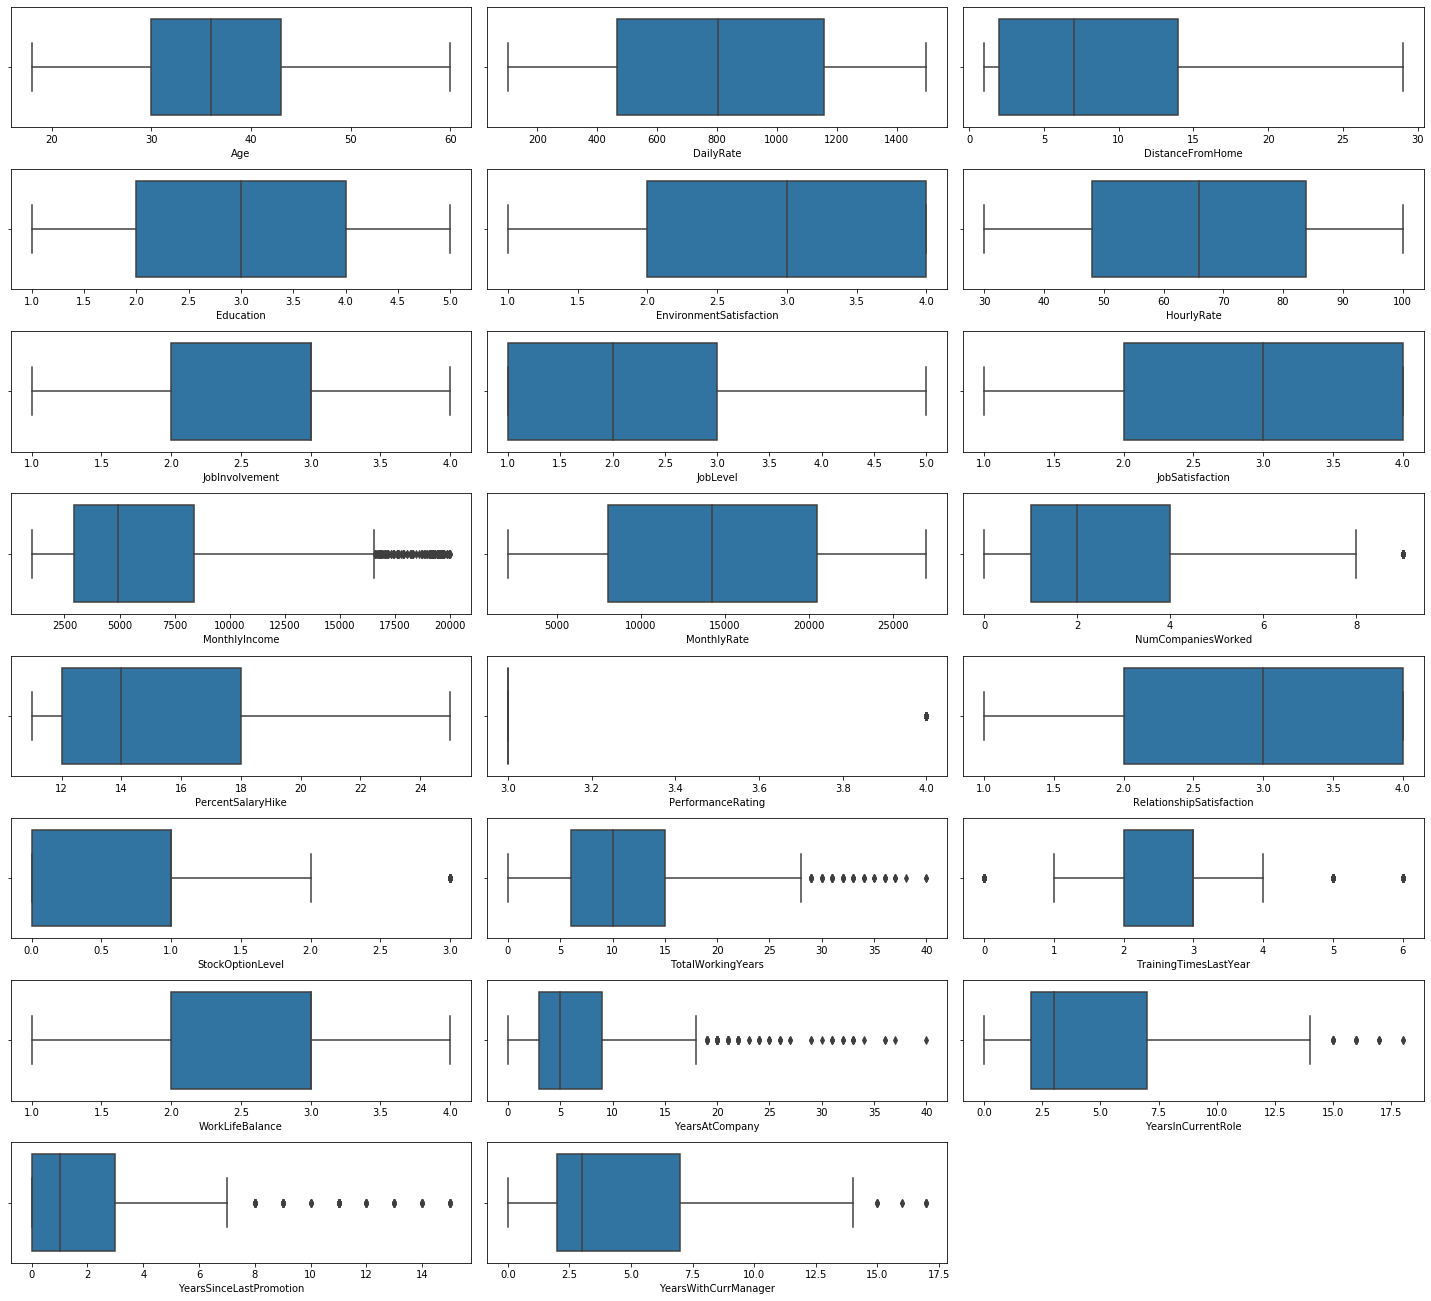

In [3385]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for column in numerical_feat :
    if plotnumber <=26:
        ax=plt.subplot(9,3,plotnumber)
        sns.boxplot(numerical_feat[column])
    plotnumber+=1
plt.tight_layout()

**We can interpret easily that there are outlier in mentioned below featurs:**

-NumCompaniesWorked

-TotalWorkingYears

-TrainingTimeLastYear 

-YearssAtCompany

-YearsCurrentRole

-YearsSinceLastPromotion 

-Yearwithcurrmanager 

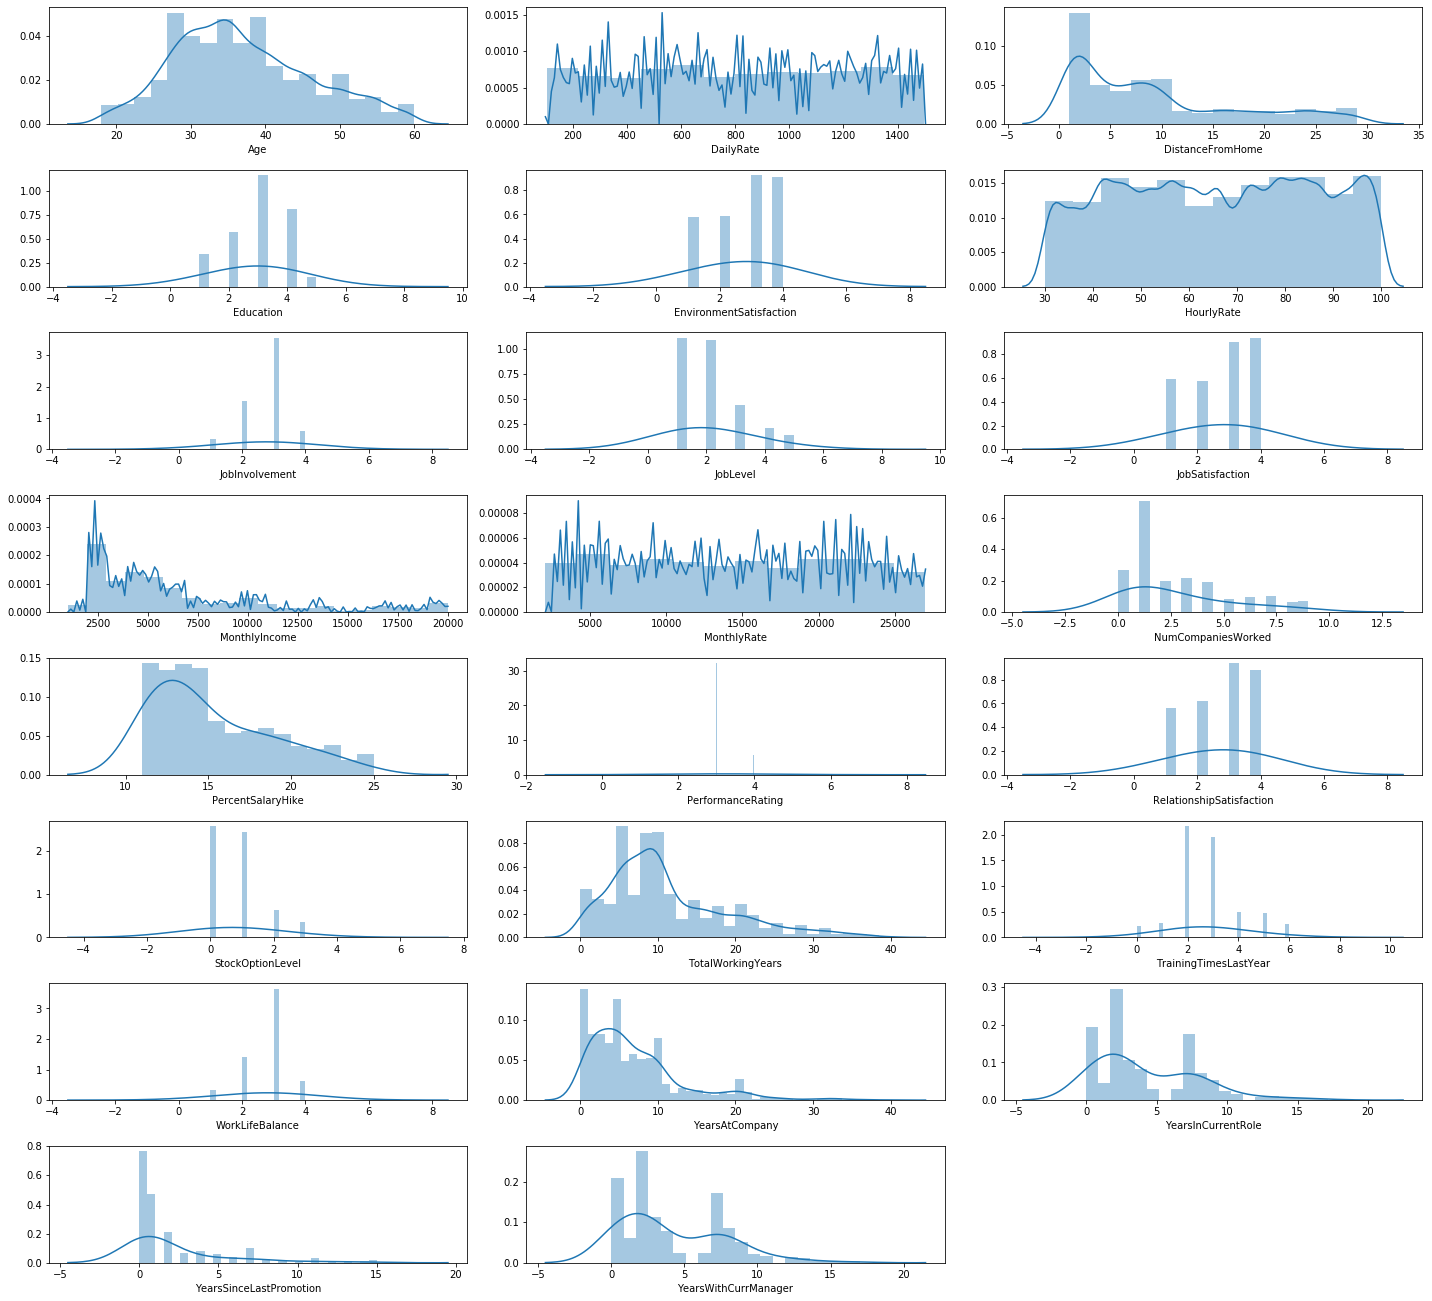

In [3386]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for column in numerical_feat:
    if plotnumber <=26:
        ax=plt.subplot(9,3,plotnumber)
        sns.distplot(numerical_feat[column],kde_kws={'bw': 1.5})
    plotnumber+=1
plt.tight_layout()

In [3387]:
numerical_feat.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

**We can interpret from above that our features are skeweed as below:**

Right Skeweed:

-DistanceFromHome

-JobLevel

-MonthlyIncome

-NumCompaniesWorked

-PercentSalaryHike

-StockOptionLevel

-TotalWorkingYears

-TrainingTimesLastYear

-YearsAtCompany

-YearsInCurrentRole

-YearsSinceLastPromotion

-YearsWithCurrManager

Left Skweed:

-WorkLifeBalance

# 12.Dealing with Outliers

### Dealing with NumCompaniesWorked

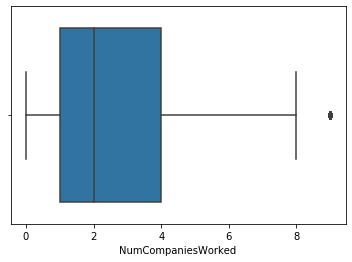

In [3388]:
sns.boxplot(data["NumCompaniesWorked"])

In [3389]:
upper_limit = data["NumCompaniesWorked"].mean() + 3*data["NumCompaniesWorked"].std()
lower_limit = data["NumCompaniesWorked"].mean() - 3*data["NumCompaniesWorked"].std()

data['NumCompaniesWorked'] = np.where(
    data['NumCompaniesWorked']>upper_limit,
    upper_limit,
    np.where(
        data['NumCompaniesWorked']<lower_limit,
        lower_limit,
        data['NumCompaniesWorked']
    )
)


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


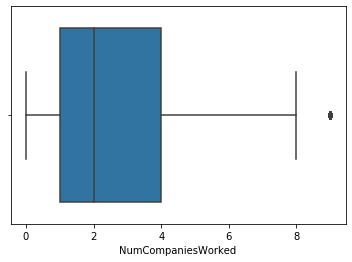

In [3390]:
sns.boxplot(data["NumCompaniesWorked"])

### Dealing with TotalWorkingYears

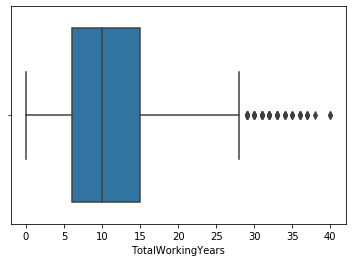

In [3391]:
sns.boxplot(data["TotalWorkingYears"])

In [3392]:
upper_limit = data["TotalWorkingYears"].mean() + 3*data["TotalWorkingYears"].std()
lower_limit = data["TotalWorkingYears"].mean() - 3*data["TotalWorkingYears"].std()

data['TotalWorkingYears'] = np.where(
    data['TotalWorkingYears']>upper_limit,
    upper_limit,
    np.where(
        data['TotalWorkingYears']<lower_limit,
        lower_limit,
        data['TotalWorkingYears']
    )
)


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


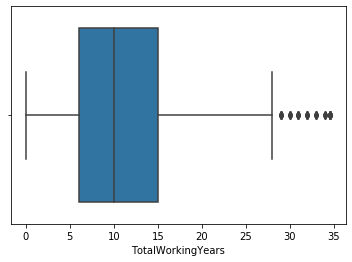

In [3393]:
sns.boxplot(data["TotalWorkingYears"])

### Dealing with TrainingTimeLastYear

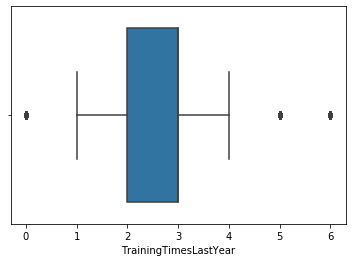

In [3394]:
sns.boxplot(data["TrainingTimesLastYear"])

In [3395]:
upper_limit = data["TrainingTimesLastYear"].mean() + 3*data["TrainingTimesLastYear"].std()
lower_limit = data["TrainingTimesLastYear"].mean() - 3*data["TrainingTimesLastYear"].std()

data['TrainingTimesLastYear'] = np.where(
    data['TrainingTimesLastYear']>upper_limit,
    upper_limit,
    np.where(
        data['TrainingTimesLastYear']<lower_limit,
        lower_limit,
        data['TrainingTimesLastYear']
    )
)


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


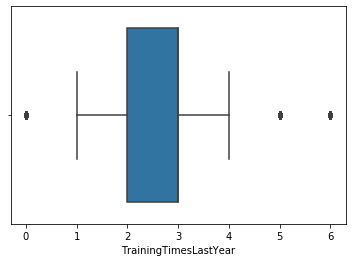

In [3396]:
sns.boxplot(data["TrainingTimesLastYear"])

### Dealing with YearsAtCompany

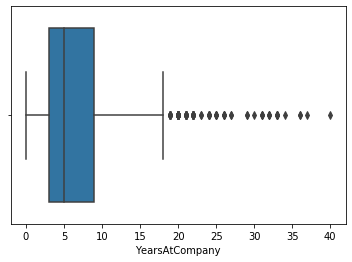

In [3397]:
sns.boxplot(data["YearsAtCompany"])

In [3398]:
upper_limit = data["YearsAtCompany"].mean() + 3*data["YearsAtCompany"].std()
lower_limit = data["YearsAtCompany"].mean() - 3*data["YearsAtCompany"].std()

data['YearsAtCompany'] = np.where(
    data['YearsAtCompany']>upper_limit,
    upper_limit,
    np.where(
        data['YearsAtCompany']<lower_limit,
        lower_limit,
        data['YearsAtCompany']
    )
)


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


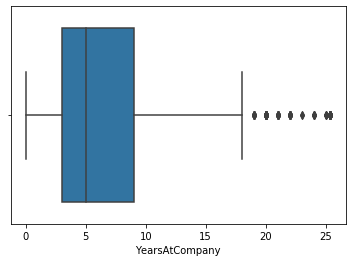

In [3399]:
sns.boxplot(data["YearsAtCompany"])

### Dealing with YearsCurrentRole

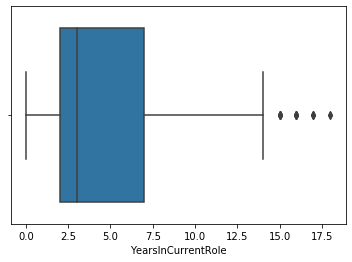

In [3400]:
sns.boxplot(data["YearsInCurrentRole"])

In [3401]:
upper_limit = data["YearsInCurrentRole"].mean() + 3*data["YearsInCurrentRole"].std()
lower_limit = data["YearsInCurrentRole"].mean() - 3*data["YearsInCurrentRole"].std()

data['YearsInCurrentRole'] = np.where(
    data['YearsInCurrentRole']>upper_limit,
    upper_limit,
    np.where(
        data['YearsInCurrentRole']<lower_limit,
        lower_limit,
        data['YearsInCurrentRole']
    )
)


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


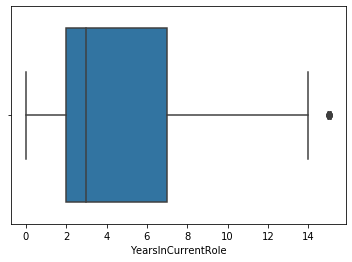

In [3402]:
sns.boxplot(data["YearsInCurrentRole"])

### Dealing with YearsSinceLastPromotion

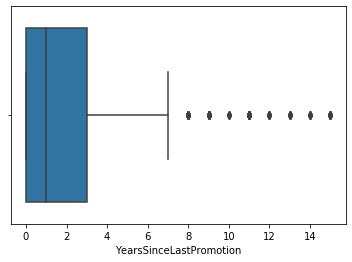

In [3403]:
sns.boxplot(data["YearsSinceLastPromotion"])

In [3404]:
upper_limit = data["YearsSinceLastPromotion"].mean() + 3*data["YearsSinceLastPromotion"].std()
lower_limit = data["YearsSinceLastPromotion"].mean() - 3*data["YearsSinceLastPromotion"].std()

data['YearsSinceLastPromotion'] = np.where(
    data['YearsSinceLastPromotion']>upper_limit,
    upper_limit,
    np.where(
        data['YearsSinceLastPromotion']<lower_limit,
        lower_limit,
        data['YearsSinceLastPromotion']
    )
)


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


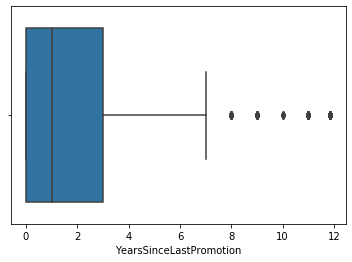

In [3405]:
sns.boxplot(data["YearsSinceLastPromotion"])

### Dealing with YearsWithCurrManager

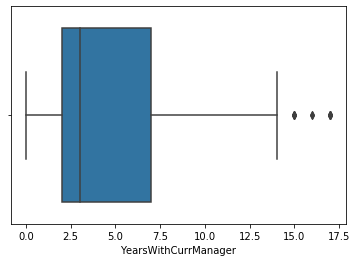

In [3406]:
sns.boxplot(data["YearsWithCurrManager"])

In [3407]:
upper_limit = data["YearsWithCurrManager"].mean() + 3*data["YearsWithCurrManager"].std()
lower_limit = data["YearsWithCurrManager"].mean() - 3*data["YearsWithCurrManager"].std()

data['YearsWithCurrManager'] = np.where(
    data['YearsWithCurrManager']>upper_limit,
    upper_limit,
    np.where(
        data['YearsWithCurrManager']<lower_limit,
        lower_limit,
        data['YearsWithCurrManager']
    )
)


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


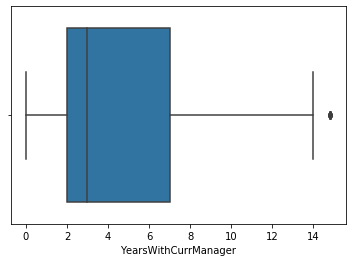

In [3408]:
sns.boxplot(data["YearsWithCurrManager"])

# 13.Dealing with Skewness

### DistanceFromHome

In [3409]:
data["DistanceFromHome"].skew()

0.9581179956568269

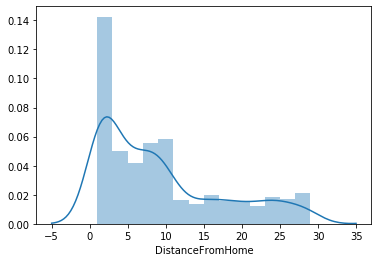

In [3410]:
sns.distplot(data["DistanceFromHome"])

In [3411]:
quant1 = data["DistanceFromHome"].quantile(.98) 
quant2 = data["DistanceFromHome"].quantile(.10)

In [3412]:
data = data[data["DistanceFromHome"] < quant1]
data = data[data["DistanceFromHome"] > quant2]

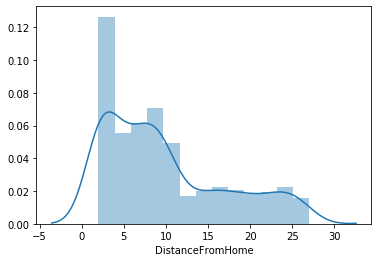

In [3413]:
sns.distplot(data["DistanceFromHome"])

In [3414]:
data["DistanceFromHome"].skew()

0.8394500697451004

### JobLevel

In [3415]:
data["JobLevel"].skew()

1.042514547193043

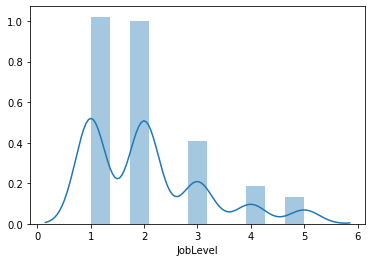

In [3416]:
sns.distplot(data["JobLevel"])

In [3417]:
quant = data["JobLevel"].quantile(.98) 
data = data[data["JobLevel"] < quant]

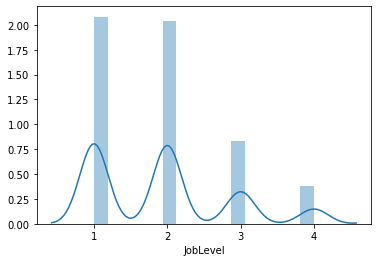

In [3418]:
sns.distplot(data["JobLevel"])

In [3419]:
data["JobLevel"].skew()

0.754681747208931

### MonthlyIncome

In [3420]:
data["MonthlyIncome"].skew()

1.3531428777232952

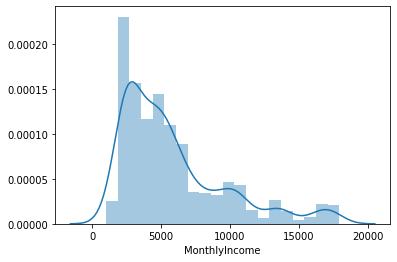

In [3421]:
sns.distplot(data["MonthlyIncome"])

In [3422]:
quant = data["MonthlyIncome"].quantile(.96) 
data = data[data["MonthlyIncome"] < quant]

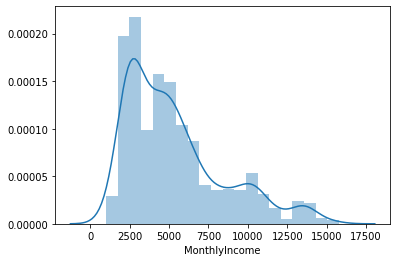

In [3423]:
sns.distplot(data["MonthlyIncome"])

In [3424]:
data["MonthlyIncome"].skew()

1.1029854828911445

### NumCompaniesWorked

In [3425]:
data["NumCompaniesWorked"].skew()

1.05648281571972

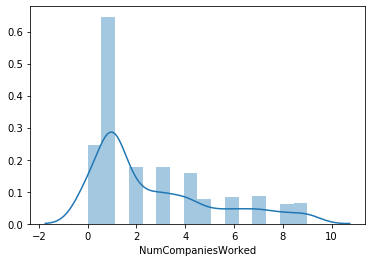

In [3426]:
sns.distplot(data["NumCompaniesWorked"])

In [3427]:
quant1 = data["NumCompaniesWorked"].quantile(.98) 
quant2 = data["NumCompaniesWorked"].quantile(.10)

In [3428]:
data = data[data["NumCompaniesWorked"] < quant1]
data = data[data["NumCompaniesWorked"] > quant2]

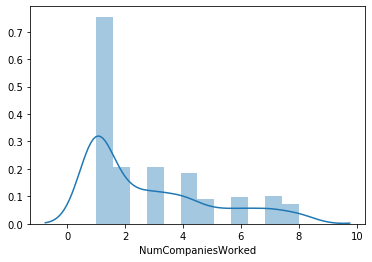

In [3429]:
sns.distplot(data["NumCompaniesWorked"])

In [3430]:
data["NumCompaniesWorked"].skew()

0.9788389804227492

### PercentSalaryHike

In [3431]:
data["PercentSalaryHike"].skew()

0.8308658650604863

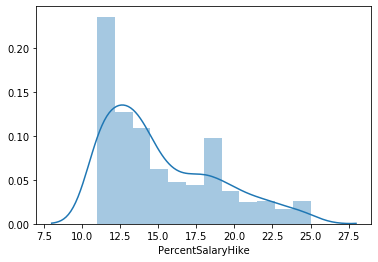

In [3432]:
sns.distplot(data["PercentSalaryHike"])

In [3433]:
quant = data["PercentSalaryHike"].quantile(.98) 
data = data[data["PercentSalaryHike"] < quant]

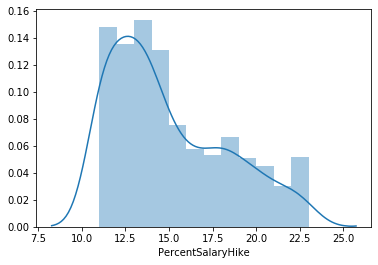

In [3434]:
sns.distplot(data["PercentSalaryHike"])

In [3435]:
data["PercentSalaryHike"].skew()

0.7349129834645464

### StockOptionLevel

In [3436]:
data["StockOptionLevel"].skew()

0.9915288838339056

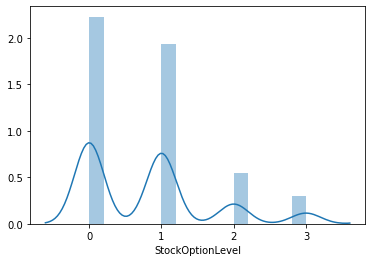

In [3437]:
sns.distplot(data["StockOptionLevel"])

In [3438]:
quant = data["StockOptionLevel"].quantile(.98) 
data = data[data["StockOptionLevel"] < quant]

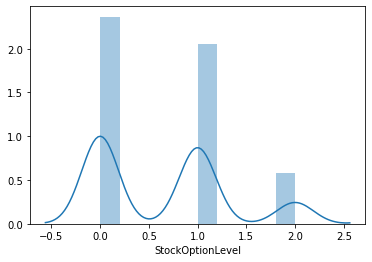

In [3439]:
sns.distplot(data["StockOptionLevel"])

In [3440]:
data["StockOptionLevel"].skew()

0.5839250206589878

### TotalWorkingYears

In [3441]:
data["TotalWorkingYears"].skew()

1.1557811175236141

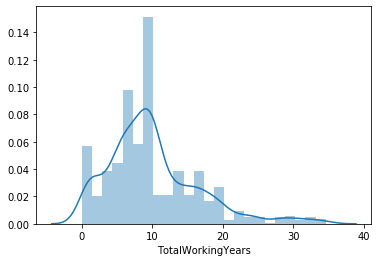

In [3442]:
sns.distplot(data["TotalWorkingYears"])

In [3443]:
quant = data["TotalWorkingYears"].quantile(.98) 
data = data[data["TotalWorkingYears"] < quant]

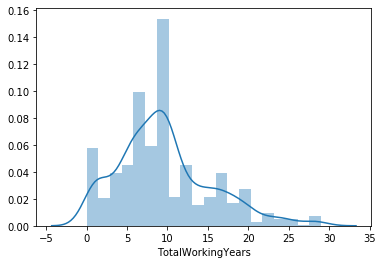

In [3444]:
sns.distplot(data["TotalWorkingYears"])

In [3445]:
data["TotalWorkingYears"].skew()

0.7836116377691441

### YearsAtCompany

In [3446]:
data["TotalWorkingYears"].skew()

0.7836116377691441

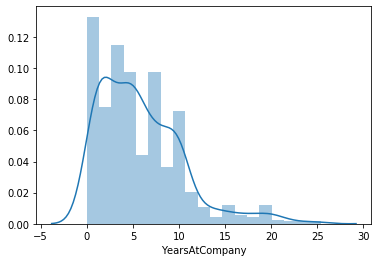

In [3447]:
sns.distplot(data["YearsAtCompany"])

In [3448]:
quant = data["YearsAtCompany"].quantile(.98) 
data = data[data["YearsAtCompany"] < quant]

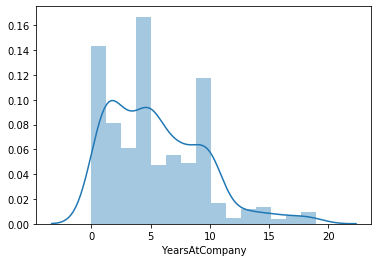

In [3449]:
sns.distplot(data["YearsAtCompany"])

In [3450]:
data["TotalWorkingYears"].skew()

0.7257617278961258

### YearsInCurrentRole

In [3451]:
data["YearsInCurrentRole"].skew()

0.8768191675459699

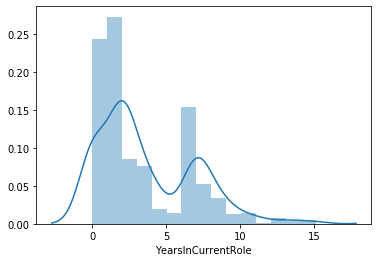

In [3452]:
sns.distplot(data["YearsInCurrentRole"])

In [3453]:
quant = data["YearsInCurrentRole"].quantile(.98) 
data = data[data["YearsInCurrentRole"] < quant]

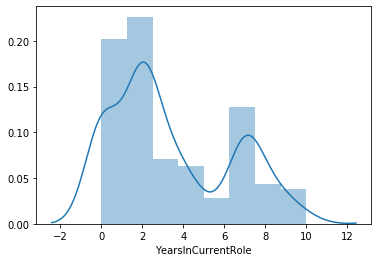

In [3454]:
sns.distplot(data["YearsInCurrentRole"])

In [3455]:
data["YearsInCurrentRole"].skew()

0.5841914721995574

### YearsSinceLastPromotion

In [3456]:
data["YearsSinceLastPromotion"].skew()

1.8948060747044413

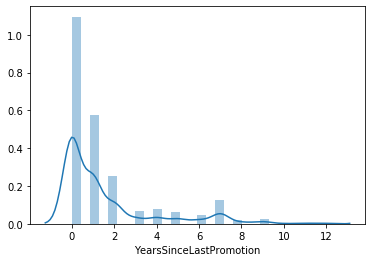

In [3457]:
sns.distplot(data["YearsSinceLastPromotion"])

In [3458]:
quant = data["YearsSinceLastPromotion"].quantile(.98) 
data = data[data["YearsSinceLastPromotion"] < quant]

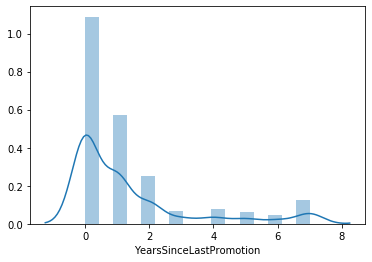

In [3459]:
sns.distplot(data["YearsSinceLastPromotion"])

In [3460]:
data["YearsSinceLastPromotion"].skew()

1.7673838699970619

### YearsWithCurrManager

In [3461]:
data["YearsWithCurrManager"].skew()

0.8142927385239896

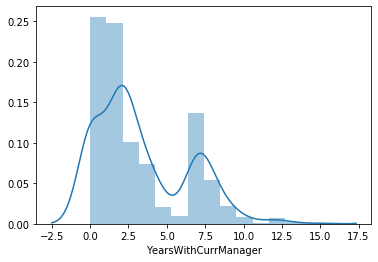

In [3462]:
sns.distplot(data["YearsWithCurrManager"])

In [3463]:
quant = data["YearsWithCurrManager"].quantile(.98) 
data = data[data["YearsWithCurrManager"] < quant]

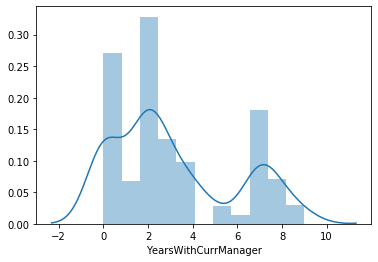

In [3464]:
sns.distplot(data["YearsWithCurrManager"])

In [3465]:
data["YearsWithCurrManager"].skew()

0.6260186859709842

### WorkLifeBalance

In [3466]:
data["WorkLifeBalance"].skew()

-0.5318481404615234

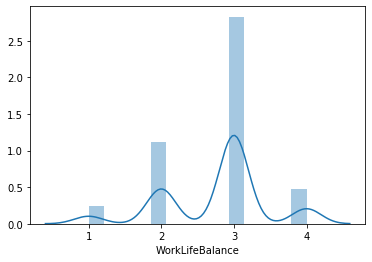

In [3467]:
sns.distplot(data["WorkLifeBalance"])

In [3468]:
quant1 = data["WorkLifeBalance"].quantile(.99) 
quant2 = data["WorkLifeBalance"].quantile(.01)

In [3469]:
data = data[data["WorkLifeBalance"] < quant1]
data = data[data["WorkLifeBalance"] > quant2]

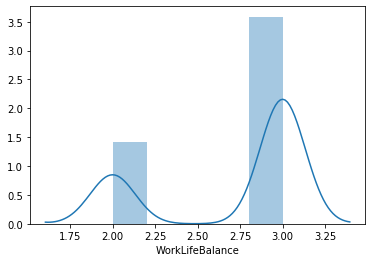

In [3470]:
sns.distplot(data["WorkLifeBalance"])

In [3471]:
data["WorkLifeBalance"].skew()

-0.9685160249517467

# 13.Dealing Inblanced Data

**As we know that our target variable class is not balanced,So we need to deal with inbalanced data before applying in model otherwise we may get high accuracy score and resul would bias.**

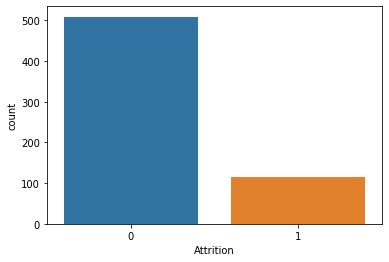

In [3472]:
sns.countplot(x=data["Attrition"])

In [3473]:
#Count Class
class_count_0, class_count_1 = data['Attrition'].value_counts()

In [3474]:
# Separate class
class_0 = data[data['Attrition'] == 0]
class_1 = data[data['Attrition'] == 1]

In [3475]:
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (509, 53)
class 1: (114, 53)


**Here our dataset having less observation so undersampling will lose lot of data hence using Oversampling method**

In [3476]:
class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)
print("total class of 1 and 0:",test_over['Attrition'].value_counts())

total class of 1 and 0: 1    509
0    509
Name: Attrition, dtype: int64


In [3477]:
data=pd.DataFrame(test_over)

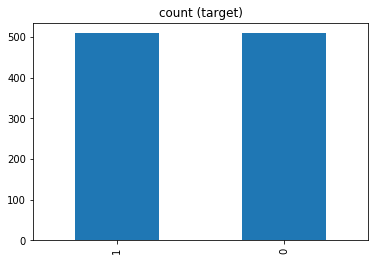

In [3478]:
# plot the count after under-sampeling
test_over['Attrition'].value_counts().plot(kind='bar', title='count (target)')

In [3479]:
data
data["Attrition"].value_counts()

1    509
0    509
Name: Attrition, dtype: int64

In [3480]:
data.shape

(1018, 53)

# 14. Split Train and Test

In [3481]:
#split the data set
x=data.drop(columns="Attrition",axis=1)

In [3482]:
y=data.Attrition

In [3483]:
x.shape

(1018, 52)

In [3484]:
y.shape

(1018,)

# 15. Scaling Transformation

In [3485]:
from sklearn.preprocessing import StandardScaler

In [3486]:
scaler=StandardScaler()

In [3487]:
x_scaled=scaler.fit_transform(x)

In [3488]:
x_scaled

array([[-0.20093741,  1.03382074, -1.15574384, ...,  0.        ,
         0.82790728, -0.82790728],
       [-0.20093741,  0.72121422,  0.70147357, ...,  0.        ,
        -1.20786473,  1.20786473],
       [-0.42231651,  0.30129501, -0.22713514, ...,  0.        ,
         0.82790728, -0.82790728],
       ...,
       [ 0.57388943, -0.47322264, -0.6251103 , ...,  0.        ,
         0.82790728, -0.82790728],
       [-0.75438515, -1.54168374, -0.89042707, ...,  0.        ,
        -1.20786473,  1.20786473],
       [ 1.68078491,  0.48326   , -1.15574384, ...,  0.        ,
         0.82790728, -0.82790728]])

In [3489]:
x_scaled.shape

(1018, 52)

# Model Building

### 15.1 Logistic Regression

In [3490]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3491]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=101)

In [3492]:
log_reg=LogisticRegression()

In [3493]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [3494]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

### 15.2 Choosing best random state for our model

In [3495]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train=log_reg.predict(x_train)
    pred_test=log_reg.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training accuracy score is-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy score is-",accuracy_score(y_test,pred_test)*100)
   

At random state 87 Model perfrom well
At random state 87
Training accuracy score is- 82.02247191011236
Testing accuracy score is- 82.02614379084967
At random state 107 Model perfrom well
At random state 107
Training accuracy score is- 83.70786516853933
Testing accuracy score is- 83.66013071895425
At random state 123 Model perfrom well
At random state 123
Training accuracy score is- 83.28651685393258
Testing accuracy score is- 83.33333333333334
At random state 138 Model perfrom well
At random state 138
Training accuracy score is- 83.00561797752809
Testing accuracy score is- 83.00653594771242


**We can choose Best Random state is 107.**

In [3497]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=107)

In [3498]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 15.3 Evaluation metrics

In [3499]:
y_pred=log_reg.predict(x_test)

In [3500]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_confusion_matrix


In [3501]:
log_reg_accuracy=accuracy_score(y_test,y_pred)

In [3502]:
log_reg_accuracy

0.8366013071895425

In [3503]:
conf_mat=confusion_matrix(y_test,y_pred)

In [3504]:
conf_mat

array([[124,  31],
       [ 19, 132]], dtype=int64)

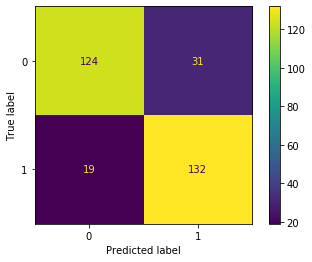

In [3505]:
plot_confusion_matrix(log_reg,x_test,y_test,values_format=".3g")

In [3506]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       155
           1       0.81      0.87      0.84       151

    accuracy                           0.84       306
   macro avg       0.84      0.84      0.84       306
weighted avg       0.84      0.84      0.84       306



### 15.4 Cross Validation technique

In [3507]:
from sklearn.model_selection import cross_val_score,cross_validate

In [3508]:
cross_val_score(log_reg,x_scaled,y,cv=5)

array([0.87254902, 0.81372549, 0.80882353, 0.77339901, 0.84729064])

In [3509]:
cross_val_score(log_reg,x_scaled,y,cv=5).mean()

0.82315753887762

### 15.5 Choosing best cv for our model

In [3510]:
for j in range(2,15):
    log_reg_score=cross_val_score(log_reg,x_scaled,y,cv=j)
    log_reg_s=log_reg_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",log_reg_score*100)
    print("Accuracy Score:",log_reg_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [83.30058939 81.5324165 ]
Accuracy Score: 82.41650294695482


At CV:- 3
Cross validation score is: [84.41176471 80.53097345 81.4159292 ]
Accuracy Score: 82.11955578691655


At CV:- 4
Cross validation score is: [84.70588235 81.17647059 81.88976378 81.88976378]
Accuracy Score: 82.4154701250579


At CV:- 5
Cross validation score is: [87.25490196 81.37254902 80.88235294 77.33990148 84.72906404]
Accuracy Score: 82.315753887762


At CV:- 6
Cross validation score is: [86.47058824 82.94117647 77.05882353 81.17647059 77.5147929  84.02366864]
Accuracy Score: 81.53092006033184


At CV:- 7
Cross validation score is: [84.24657534 86.98630137 81.50684932 77.24137931 82.06896552 78.62068966
 83.44827586]
Accuracy Score: 82.01700519603212


At CV:- 8
Cross validation score is: [85.9375     83.59375    81.88976378 76.37795276 81.88976378 80.31496063
 78.74015748 83.46456693]
Accuracy Score: 81.52605191929135


At CV:- 9
Cross validation score is: [85.0877193  84.070

**We have got CV at 13, our accuracy is more so will consider at CV 13**

In [3511]:
cross_val_score(log_reg,x_scaled,y,cv=13)

array([0.84810127, 0.84810127, 0.84810127, 0.87341772, 0.78205128,
       0.80769231, 0.76923077, 0.79487179, 0.84615385, 0.75641026,
       0.78205128, 0.92307692, 0.80769231])

In [3512]:
log_reg_cv_score=cross_val_score(log_reg,x_scaled,y,cv=13).mean()
log_reg_cv_score

0.8220732529398548

In [3513]:
log_reg_accuracy

0.8366013071895425

### 16.1 KNN

In [3515]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=107)

In [3516]:
from sklearn.neighbors import KNeighborsClassifier

In [3517]:
knn=KNeighborsClassifier()

In [3518]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 16.2 Evaluation metrics

In [3519]:
y_pred=knn.predict(x_test)

In [3520]:
knn_accuracy=accuracy_score(y_test,y_pred)

In [3521]:
knn_accuracy

0.8137254901960784

In [3522]:
cfn=confusion_matrix(y_test,y_pred)
cfn

array([[122,  33],
       [ 24, 127]], dtype=int64)

In [3523]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       155
           1       0.79      0.84      0.82       151

    accuracy                           0.81       306
   macro avg       0.81      0.81      0.81       306
weighted avg       0.81      0.81      0.81       306



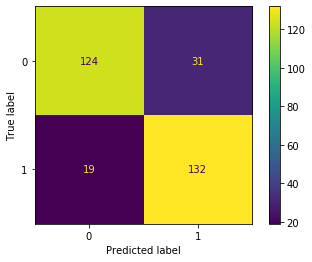

In [3524]:
plot_confusion_matrix(log_reg,x_test,y_test,values_format=".3g")

### 16.3 Cross Validation technique

In [3525]:
cross_val_score(knn,x_scaled,y,cv=5)

array([0.81862745, 0.78431373, 0.85784314, 0.8226601 , 0.84729064])

In [3526]:
cross_val_score(knn,x_scaled,y,cv=5).mean()

0.8261470105283493

### 16.4 Choosing best cv for our model

In [3527]:
for j in range(2,15):
    knn_score=cross_val_score(knn,x_scaled,y,cv=j)
    knn_s=knn_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",knn_score*100)
    print("Accuracy Score:",knn_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [73.87033399 78.19253438]
Accuracy Score: 76.03143418467585


At CV:- 3
Cross validation score is: [77.94117647 80.8259587  81.4159292 ]
Accuracy Score: 80.06102145873099


At CV:- 4
Cross validation score is: [79.21568627 80.78431373 86.22047244 84.64566929]
Accuracy Score: 82.71653543307087


At CV:- 5
Cross validation score is: [81.8627451  78.43137255 85.78431373 82.26600985 84.72906404]
Accuracy Score: 82.61470105283493


At CV:- 6
Cross validation score is: [81.76470588 80.         81.76470588 85.88235294 86.39053254 83.43195266]
Accuracy Score: 83.20570831883049


At CV:- 7
Cross validation score is: [81.50684932 81.50684932 79.45205479 88.27586207 82.75862069 86.89655172
 84.13793103]
Accuracy Score: 83.50495984884272


At CV:- 8
Cross validation score is: [80.46875    79.6875     81.88976378 84.2519685  88.18897638 85.03937008
 88.97637795 85.03937008]
Accuracy Score: 84.1927595964567


At CV:- 9
Cross validation score is: [78.94736842 84.0

**We can choose CV 14.**

In [3529]:
cross_val_score(knn,x_scaled,y,cv=14)

array([0.82191781, 0.83561644, 0.8630137 , 0.83561644, 0.83561644,
       0.83561644, 0.82191781, 0.90410959, 0.80821918, 0.87671233,
       0.81944444, 0.88888889, 0.90277778, 0.84722222])

In [3530]:
knn_cv_score=cross_val_score(knn,x_scaled,y,cv=14).mean()

In [3531]:
knn_cv_score

0.8497635355512069

### 17.1 Random Forest

In [3533]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=107)

In [3534]:
from sklearn.ensemble import RandomForestClassifier

In [3535]:
rf=RandomForestClassifier()

In [3536]:
rf.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 17.2 Evaluation

In [3537]:
y_pred=rf.predict(x_test)

In [3538]:
rf_accuracy_score=accuracy_score(y_test,y_pred)

In [3539]:
rf_accuracy_score

0.9673202614379085

In [3540]:
cfn=confusion_matrix(y_test,y_pred)
cfn

array([[151,   4],
       [  6, 145]], dtype=int64)

In [3541]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       155
           1       0.97      0.96      0.97       151

    accuracy                           0.97       306
   macro avg       0.97      0.97      0.97       306
weighted avg       0.97      0.97      0.97       306



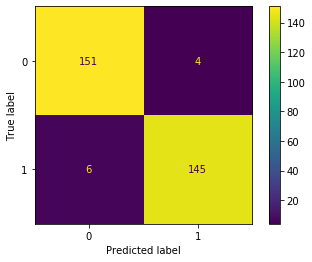

In [3542]:
plot_confusion_matrix(rf,x_test,y_test,values_format=".3g")

### 17.3 Cross Validation technique

In [3543]:
cross_val_score(rf,x_scaled,y,cv=5)

array([0.96078431, 0.96078431, 0.95588235, 0.96059113, 0.98029557])

In [3544]:
cross_val_score(rf,x_scaled,y,cv=5).mean()

0.9627016323770888

### 17.4 Choosing best cv for our model

In [3545]:
for j in range(2,15):
    rf_score=cross_val_score(rf,x_scaled,y,cv=j)
    rf_s=rf_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",rf_score*100)
    print("Accuracy Score:",rf_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [92.53438114 95.08840864]
Accuracy Score: 93.81139489194499


At CV:- 3
Cross validation score is: [95.29411765 94.10029499 97.05014749]
Accuracy Score: 95.48152004164496


At CV:- 4
Cross validation score is: [95.68627451 95.68627451 94.48818898 97.24409449]
Accuracy Score: 95.7762081210437


At CV:- 5
Cross validation score is: [96.07843137 96.56862745 94.11764706 95.56650246 97.53694581]
Accuracy Score: 95.97363083164299


At CV:- 6
Cross validation score is: [95.88235294 98.23529412 95.88235294 93.52941176 96.44970414 99.40828402]
Accuracy Score: 96.56456665506438


At CV:- 7
Cross validation score is: [94.52054795 96.57534247 95.20547945 95.17241379 97.24137931 96.55172414
 99.31034483]
Accuracy Score: 96.36817599028275


At CV:- 8
Cross validation score is: [96.875      96.875      97.63779528 95.27559055 92.12598425 96.8503937
 97.63779528 99.21259843]
Accuracy Score: 96.56126968503938


At CV:- 9
Cross validation score is: [96.49122807 95.57

**We can choose cv 13.**

In [3546]:
cross_val_score(rf,x_scaled,y,cv=13)

array([0.96202532, 0.93670886, 0.97468354, 0.98734177, 0.96153846,
       1.        , 0.92307692, 0.91025641, 0.97435897, 0.97435897,
       0.96153846, 1.        , 0.98717949])

In [3547]:
rf_cv_score=cross_val_score(rf,x_scaled,y,cv=13).mean()

In [3548]:
rf_cv_score

0.9656580031458317

In [3549]:
rf_accuracy_score

0.9673202614379085

### 18.1 AdaBooosting

In [3550]:
from sklearn.ensemble import AdaBoostClassifier

In [3551]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=107)

In [3552]:
ada=AdaBoostClassifier()

In [3553]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

### 18.2 Evaluation

In [3554]:
y_pred=ada.predict(x_test)

In [3555]:
ada_accuracy_score=accuracy_score(y_test,y_pred)

In [3556]:
ada_accuracy_score

0.8202614379084967

In [3557]:
cfn=confusion_matrix(y_test,y_pred)
cfn

array([[121,  34],
       [ 21, 130]], dtype=int64)

In [3558]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       155
           1       0.79      0.86      0.83       151

    accuracy                           0.82       306
   macro avg       0.82      0.82      0.82       306
weighted avg       0.82      0.82      0.82       306



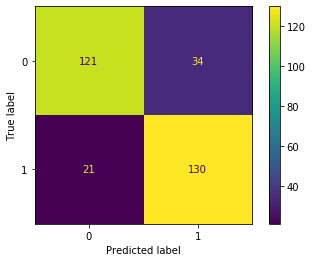

In [3559]:
plot_confusion_matrix(ada,x_test,y_test,values_format=".3g")

### 18.3 Cross Validation technique

In [3560]:
cross_val_score(ada,x_scaled,y,cv=5)

array([0.85784314, 0.84803922, 0.82352941, 0.83743842, 0.88669951])

In [3561]:
ada_cv_score=cross_val_score(ada,x_scaled,y,cv=5).mean()

In [3562]:
ada_cv_score


0.850709939148073

### 18.4 Choosing best cv for our model

In [3563]:
for j in range(2,15):
    ada_score=cross_val_score(ada,x_scaled,y,cv=j)
    ada_s=ada_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",ada_score*100)
    print("Accuracy Score:",ada_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [84.67583497 84.08644401]
Accuracy Score: 84.3811394891945


At CV:- 3
Cross validation score is: [81.47058824 84.66076696 82.89085546]
Accuracy Score: 83.00740355139105


At CV:- 4
Cross validation score is: [84.31372549 87.45098039 83.85826772 88.58267717]
Accuracy Score: 86.05141269106068


At CV:- 5
Cross validation score is: [85.78431373 84.80392157 82.35294118 83.74384236 88.66995074]
Accuracy Score: 85.0709939148073


At CV:- 6
Cross validation score is: [78.82352941 86.47058824 87.05882353 83.52941176 83.43195266 88.16568047]
Accuracy Score: 84.5799976795452


At CV:- 7
Cross validation score is: [82.19178082 83.56164384 87.67123288 83.44827586 85.51724138 84.13793103
 85.51724138]
Accuracy Score: 84.57790674134557


At CV:- 8
Cross validation score is: [78.125      85.15625    88.18897638 88.97637795 79.52755906 84.2519685
 85.82677165 88.97637795]
Accuracy Score: 84.87866018700787


At CV:- 9
Cross validation score is: [79.8245614  84.9557

**We can choose cv 4.**

In [3564]:
cross_val_score(ada,x_scaled,y,cv=4)

array([0.84313725, 0.8745098 , 0.83858268, 0.88582677])

In [3565]:
ada_cv_score=cross_val_score(ada,x_scaled,y,cv=4).mean()

In [3566]:
ada_cv_score

0.8605141269106067

In [3567]:
ada_accuracy_score


0.8202614379084967

### 19.1 GradientBoostingClassifier

In [3568]:
from sklearn.ensemble import GradientBoostingClassifier

In [3569]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=107)

In [3570]:
gb=GradientBoostingClassifier()

In [3571]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### 19.2 Evaluation

In [3572]:
y_pred=gb.predict(x_test)

In [3573]:
gb_accuracy_score=accuracy_score(y_test,y_pred)

In [3574]:
gb_accuracy_score

0.9313725490196079

In [3575]:
cfn=confusion_matrix(y_test,y_pred)
cfn

array([[138,  17],
       [  4, 147]], dtype=int64)

In [3576]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       155
           1       0.90      0.97      0.93       151

    accuracy                           0.93       306
   macro avg       0.93      0.93      0.93       306
weighted avg       0.93      0.93      0.93       306



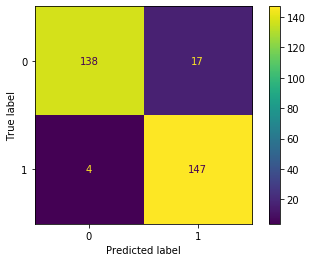

In [3577]:
plot_confusion_matrix(gb,x_test,y_test,values_format=".3g")

### 19.3 Cross Validation technique

In [3578]:
cross_val_score(gb,x_scaled,y,cv=5)

array([0.93627451, 0.89705882, 0.91666667, 0.91133005, 0.97044335])

In [3579]:
cross_val_score(gb,x_scaled,y,cv=5).mean()

0.9263546798029557

### 19.4 Choosing best cv for our model

In [3580]:
for j in range(2,15):
    gb_score=cross_val_score(gb,x_scaled,y,cv=j)
    gb_s=gb_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",gb_score*100)
    print("Accuracy Score:",gb_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [88.60510806 92.73084479]
Accuracy Score: 90.66797642436148


At CV:- 3
Cross validation score is: [89.11764706 90.26548673 92.92035398]
Accuracy Score: 90.76782925559604


At CV:- 4
Cross validation score is: [91.76470588 89.01960784 92.12598425 95.27559055]
Accuracy Score: 92.04647213215995


At CV:- 5
Cross validation score is: [93.62745098 89.70588235 91.66666667 91.13300493 97.04433498]
Accuracy Score: 92.63546798029557


At CV:- 6
Cross validation score is: [91.76470588 93.52941176 90.58823529 90.58823529 91.12426036 96.44970414]
Accuracy Score: 92.3407587887226


At CV:- 7
Cross validation score is: [90.4109589  92.46575342 90.4109589  91.03448276 93.10344828 90.34482759
 97.93103448]
Accuracy Score: 92.24306633376071


At CV:- 8
Cross validation score is: [89.84375    93.75       92.91338583 86.61417323 89.76377953 92.12598425
 92.12598425 96.8503937 ]
Accuracy Score: 91.74843134842519


At CV:- 9
Cross validation score is: [89.47368421 92.0

**We can choose cv 11.**

In [3581]:
cross_val_score(gb,x_scaled,y,cv=11)

array([0.90322581, 0.94623656, 0.90322581, 0.93548387, 0.90322581,
       0.89247312, 0.92391304, 0.92391304, 0.91304348, 0.97826087,
       0.94565217])

In [3582]:
gb_cv_score=cross_val_score(gb,x_scaled,y,cv=11).mean()

In [3583]:
gb_cv_score

0.9263993369883973

# 20.Lets choose the best model with ROC AUC Curve

In [3584]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [3585]:
log_reg_pred=log_reg.predict(x_test)
knn_pred=knn.predict(x_test)
rf_pred=rf.predict(x_test)
ada_pred=ada.predict(x_test)
gb_pred=gb.predict(x_test)

In [3586]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, log_reg_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, ada_pred, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, gb_pred, pos_label=1)

In [3587]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [3588]:
# auc scores
auc_score_log_reg = roc_auc_score(y_test, log_reg_pred)
auc_score_knn = roc_auc_score(y_test, knn_pred)
auc_score_rf = roc_auc_score(y_test, rf_pred)
auc_score_ada = roc_auc_score(y_test, ada_pred)
auc_score_gb = roc_auc_score(y_test, gb_pred)
print(round(auc_score_log_reg,2)*100, round(auc_score_knn,2)*100,round(auc_score_rf,2)*100,round(auc_score_ada,2)*100,round(auc_score_gb,2)*100)

84.0 81.0 97.0 82.0 93.0


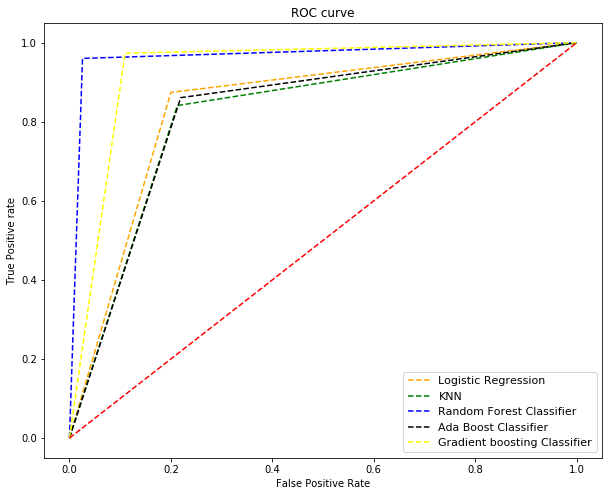

In [3589]:
plt.figure(figsize=(10,8))
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3,tpr3,linestyle='--',color='blue', label='Random Forest Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Ada Boost Classifier')
plt.plot(fpr5,tpr5,linestyle='--',color='yellow', label='Gradient boosting Classifier')

plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(prop={'size':11},loc='lower right')
plt.savefig('ROC',dpi=300)
plt.show();

**As we can see from Roc Auc Curve that Random Forest Classifier model is performing well in this dataset.**

# 21 Choosing best model by checking cross validation score

In [3590]:
Logistic_Regression={"Accuracy Score":(log_reg_accuracy,2),
                    "CV Score":(log_reg_cv_score,2),
                    "Difference":log_reg_accuracy-log_reg_cv_score}
Knn={"Accuracy Score":(knn_accuracy,2),
                    "CV Score":(knn_cv_score,2),
                    "Difference":knn_accuracy-knn_cv_score}
Random_Forest={"Accuracy Score":(rf_accuracy_score,2),
                    "CV Score":(rf_cv_score,2),
                    "Difference":rf_accuracy_score-rf_cv_score}
Ada_Boost={"Accuracy Score":(ada_accuracy_score,2),
                    "CV Score":(ada_cv_score,2),
                    "Difference":ada_accuracy_score-ada_cv_score}
Gradient_Boost={"Accuracy Score":(gb_accuracy_score,2),
                    "CV Score":(gb_cv_score,2),
                    "Difference":gb_accuracy_score-gb_cv_score}


In [3591]:
data=np.array([[log_reg_accuracy,log_reg_cv_score,log_reg_accuracy-log_reg_cv_score],[knn_accuracy,knn_cv_score,knn_accuracy-knn_cv_score],[rf_accuracy_score,rf_cv_score,rf_accuracy_score-rf_cv_score],[ada_accuracy_score,ada_cv_score,ada_accuracy_score-ada_cv_score],[gb_accuracy_score,gb_cv_score,gb_accuracy_score-gb_cv_score]])

In [3592]:
index_value=["LogisticRegression","KNNeighbors","RandomForest","Ada Boost","Gradient Boost"]

In [3593]:
columns_value=["Accuracy Score","Cross Validation Score","Difference"]

In [3594]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [3595]:
model_selection

Accuracy Score  Cross Validation Score  Difference
LogisticRegression        0.836601                0.822073    0.014528
KNNeighbors               0.813725                0.849764   -0.036038
RandomForest              0.967320                0.965658    0.001662
Ada Boost                 0.820261                0.860514   -0.040253
Gradient Boost            0.931373                0.926399    0.004973

**After checking accuracy score vs cross validation score random forest model performance is good, so we will select Random Forest Model.**

# 22. Hypertuning for our best model ( Random Forest)

In [3600]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=107)

In [3642]:
params={'n_estimators':[10,25,50,100,110,150],
       'criterion':['entropy',"gini"],
       'min_samples_split':[2,6,8,10],
        'min_samples_leaf':[1,5,8,10]
       }

In [3643]:
grd=GridSearchCV(rf,param_grid=params)

In [3644]:
grd.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=15,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [3647]:
rf=grd.best_estimator_

In [3648]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [3649]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [3650]:
y_pred=rf.predict(x_test)

# 23. Random Forest Evaluation matrix

In [3651]:
accuracy_score(y_test,y_pred)

0.9705882352941176

In [3652]:
rf_accuracy_score=accuracy_score(y_test,y_pred)

In [3653]:
rf_accuracy_score

0.9705882352941176

In [3654]:
cfn=confusion_matrix(y_test,y_pred)
cfn

array([[150,   5],
       [  4, 147]], dtype=int64)

In [3655]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       155
           1       0.97      0.97      0.97       151

    accuracy                           0.97       306
   macro avg       0.97      0.97      0.97       306
weighted avg       0.97      0.97      0.97       306



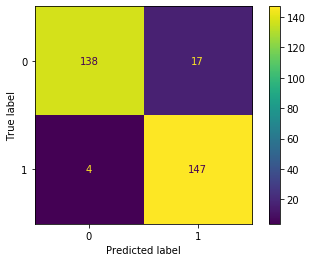

In [3656]:
plot_confusion_matrix(gb,x_test,y_test,values_format=".3g")

In [3657]:
rf_accuracy_score

0.9705882352941176

# 24.Prediction of Attrition

In [3799]:
y_pred=rf.predict(x_test)

In [3800]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,

# 25 Checking the best features for model

In [4003]:
feature_score=rf.feature_importances_

In [4004]:
feature=x.columns

In [4005]:
feat=pd.DataFrame()
feat["Feature_name"]=feature
feat.set_index('Feature_name')
feat["Feature_score"]=feature_score
feat

Feature_name  Feature_score
0                         Age       0.058403
1                   DailyRate       0.040088
2            DistanceFromHome       0.045469
3                   Education       0.020300
4     EnvironmentSatisfaction       0.024739
5                  HourlyRate       0.046726
6              JobInvolvement       0.026227
7                    JobLevel       0.026856
8             JobSatisfaction       0.025214
9               MonthlyIncome       0.068125
10                MonthlyRate       0.043110
11         NumCompaniesWorked       0.018034
12          PercentSalaryHike       0.029124
13          PerformanceRating       0.004289
14   RelationshipSatisfaction       0.017631
15           StockOptionLevel       0.049782
16          TotalWorkingYears       0.046532
17      TrainingTimesLastYear       0.020146
18            WorkLifeBalance       0.010405
19             YearsAtCompany       0.029932
20         YearsInCurrentRole       0.030026
21    YearsSinceLastPromotion       0.020027
22       YearsWithCurrManager       0.022133
23                 Non-Travel       0.004692
24          Travel_Frequently       0.012058
25              Travel_Rarely       0.011429
26            Human Resources       0.001578
27     Research & Development       0.009365
28                      Sales       0.012431
29            Human Resources       0.001761
30              Life Sciences       0.008166
31                  Marketing       0.011754
32                    Medical       0.007038
33                      Other       0.003779
34           Technical Degree       0.003114
35                     Female       0.008143
36                       Male       0.011533
37  Healthcare Representative       0.004742
38            Human Resources       0.001586
39      Laboratory Technician       0.008000
40                    Manager       0.000671
41     Manufacturing Director       0.004350
42          Research Director       0.000555
43         Research Scientist       0.006835
44            Sales Executive       0.010368
45       Sales Representative       0.003678
46                   Divorced       0.009630
47                    Married       0.008312
48                     Single       0.026347
49                          Y       0.000000
50                         No       0.039666
51                        Yes       0.045104

In [4006]:
feat1=feat[0:23]

In [4007]:
feat1=feat1.set_index('Feature_name')

In [4008]:
final_feat=pd.DataFrame()

In [4009]:
final_feat["BusinessTravel"]=feat.iloc[23]+feat.iloc[24]+feat.iloc[25]
final_feat["Department"]=feat.iloc[26]+feat.iloc[27]+feat.iloc[28]
final_feat["EducationField"]=feat.iloc[29]+feat.iloc[30]+feat.iloc[31]+feat.iloc[32]+feat.iloc[33]+feat.iloc[34]
final_feat["Gender"]=feat.iloc[35]+feat.iloc[36]
final_feat["JobRole"]=feat.iloc[37]+feat.iloc[38]+feat.iloc[39]+feat.iloc[40]+feat.iloc[41]+feat.iloc[42]+feat.iloc[43]+feat.iloc[44]+feat.iloc[45]
final_feat["MaritalStatus"]=feat.iloc[46]+feat.iloc[47]+feat.iloc[48]
final_feat["Over18"]=feat.iloc[49]
final_feat["OverTime"]=feat.iloc[50]+feat.iloc[51]
final_feat=final_feat.transpose()
final_feat.drop("Feature_name",axis=1,inplace=True)

In [4010]:
feature_score=pd.concat([feat1,final_feat],axis=0)

In [4011]:
feature_score.index = feature_score.index.set_names(['Feature Name'])

In [4012]:
feature_score=feature_score.sort_values("Feature_score",ascending=False)

In [4013]:
feature_score

Feature_score
Feature Name                          
OverTime                     0.0847698
MonthlyIncome                0.0681249
Age                           0.058403
StockOptionLevel             0.0497816
HourlyRate                   0.0467264
TotalWorkingYears            0.0465316
DistanceFromHome             0.0454687
MaritalStatus                0.0442892
MonthlyRate                  0.0431102
JobRole                      0.0407853
DailyRate                    0.0400875
EducationField               0.0356121
YearsInCurrentRole            0.030026
YearsAtCompany               0.0299323
PercentSalaryHike             0.029124
BusinessTravel               0.0281786
JobLevel                     0.0268564
JobInvolvement               0.0262273
JobSatisfaction              0.0252136
EnvironmentSatisfaction      0.0247389
Department                   0.0233735
YearsWithCurrManager         0.0221325
Education                    0.0202996
TrainingTimesLastYear        0.0201464
YearsSinceLastPromotion      0.0200266
Gender                        0.019676
NumCompaniesWorked           0.0180337
RelationshipSatisfaction     0.0176308
WorkLifeBalance              0.0104047
PerformanceRating           0.00428882
Over18                               0

# 26. Conclusion 

**From our above result we can see the top 15 features are playing very important role on employee attrition.**

- Over Time

- MonthlyIncome

- Age

- Stock Option Level

- Hourly Rate

- Total Working years

- Distance From Home

- Martial Status

- Job Role

- Daily Rate

- Education Field

- Years in Current Role

- Years at company

- Percent Salary Hike

- Business Travel

**If Company wants to control attrition then these areas need to work on carefully.**


# 26. Saving Model

In [3801]:
import pickle
filename="hr_attrition.pkl"
pickle.dump(rf,open(filename,"wb"))